# <font color='purple'>Preprocessing QC statistics </font> 
## Noam, July 2023


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
MOMAPS_HOME = '/home/labs/hornsteinlab/Collaboration/MOmaps'
LOGS_PATH = os.path.join(MOMAPS_HOME, 'src', 'preprocessing', 'logs','np')
PLOT_PATH = os.path.join(MOMAPS_HOME, 'src', 'preprocessing', 'notebooks','figures','NP')
os.chdir(MOMAPS_HOME)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", font_scale=1.5)
sns.color_palette("husl", 8)
plt.rcParams["image.cmap"] = "Set1"
from tqdm.notebook import tqdm
from src.common.lib.preprocessing_utils import rescale_intensity
from src.common.lib.images_qc import *
sys.path.insert(1, "/home/labs/hornsteinlab/Collaboration/MOmaps_Sagy/MOmaps/src/common/lib")
import contextlib
import io
import matplotlib
import warnings
warnings.filterwarnings('ignore', category=pd.core.common.SettingWithCopyWarning)
from src.common.lib.qc_config_tmp import *


In [3]:
df = log_files_qc(LOGS_PATH)


Total of 4 files were read.
Before dup handeling  (31900, 20)
After duplication removal #1: (31900, 21)
After duplication removal #2: (31900, 21)


## validate folder structure and files existence

In [16]:
# choose batches
batches = [f'batch{i}' for i in range (1,5)]
#batches=['batch5']

### Raw Files

batch1
Folder structure is valid.
All files exists.


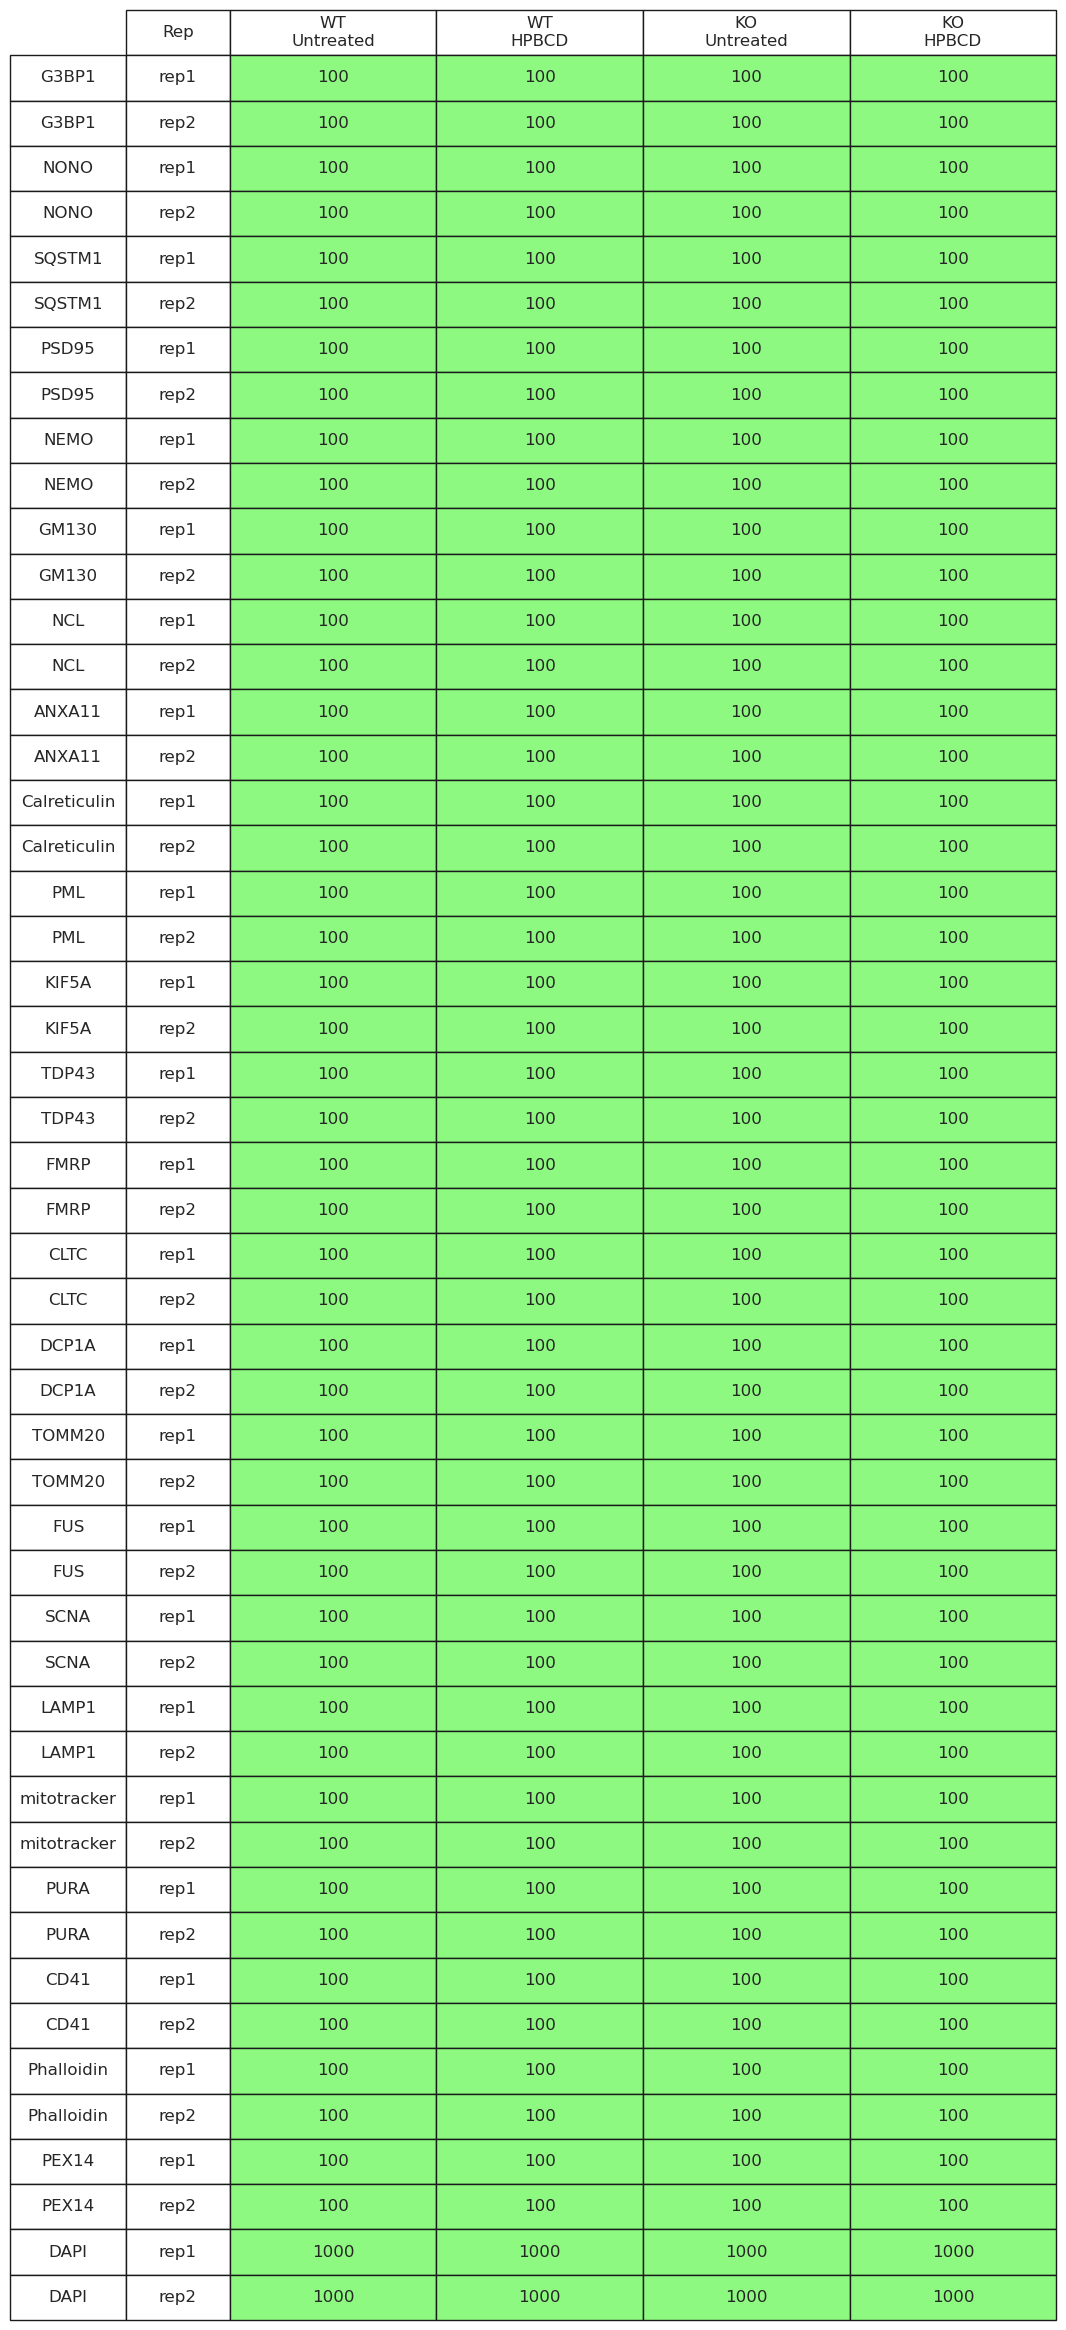

batch2
Folder structure is valid.
All files exists.


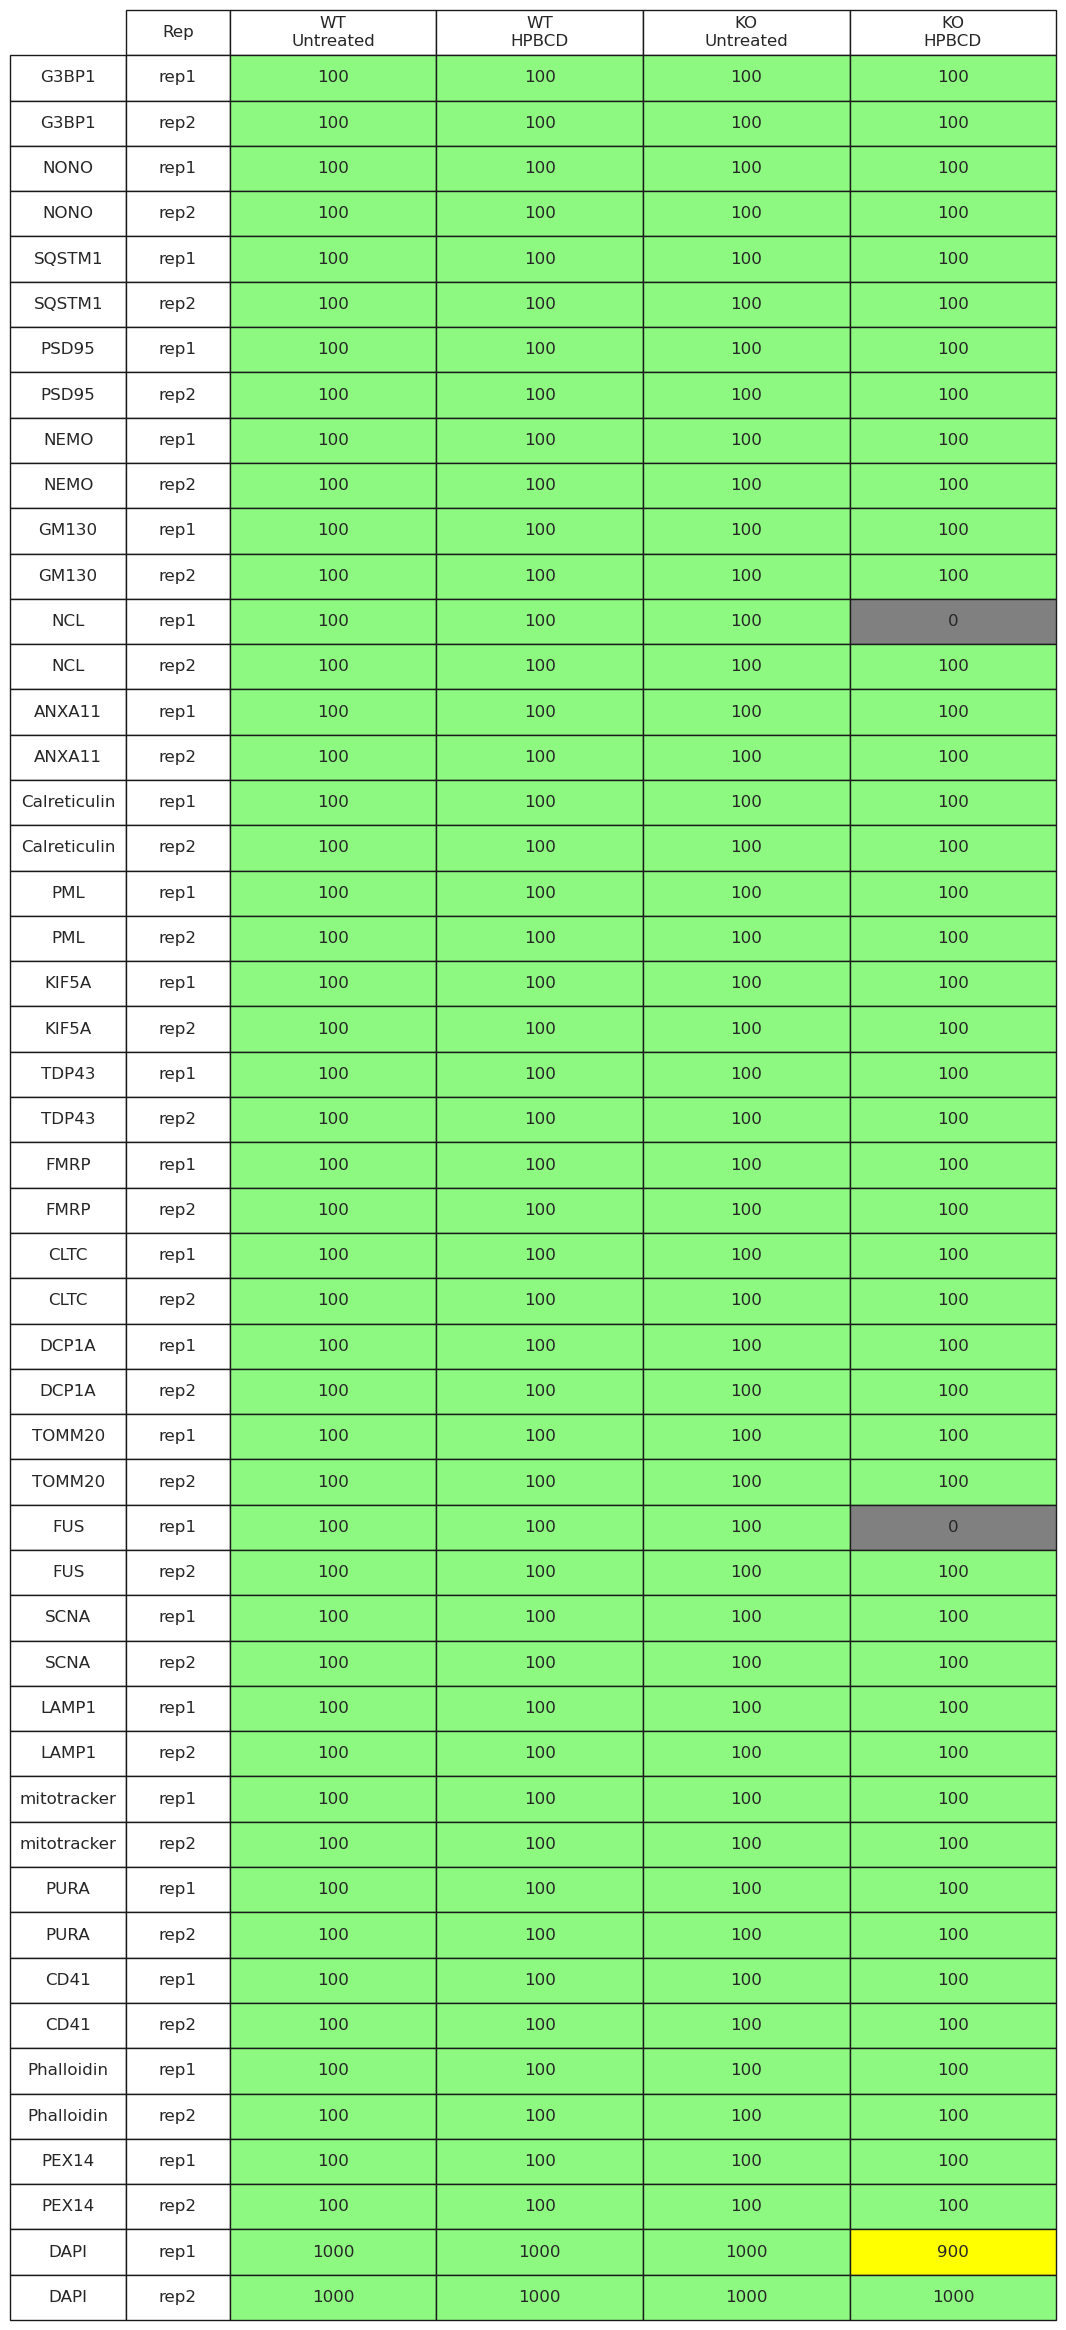

batch3
Folder structure is valid.
All files exists.


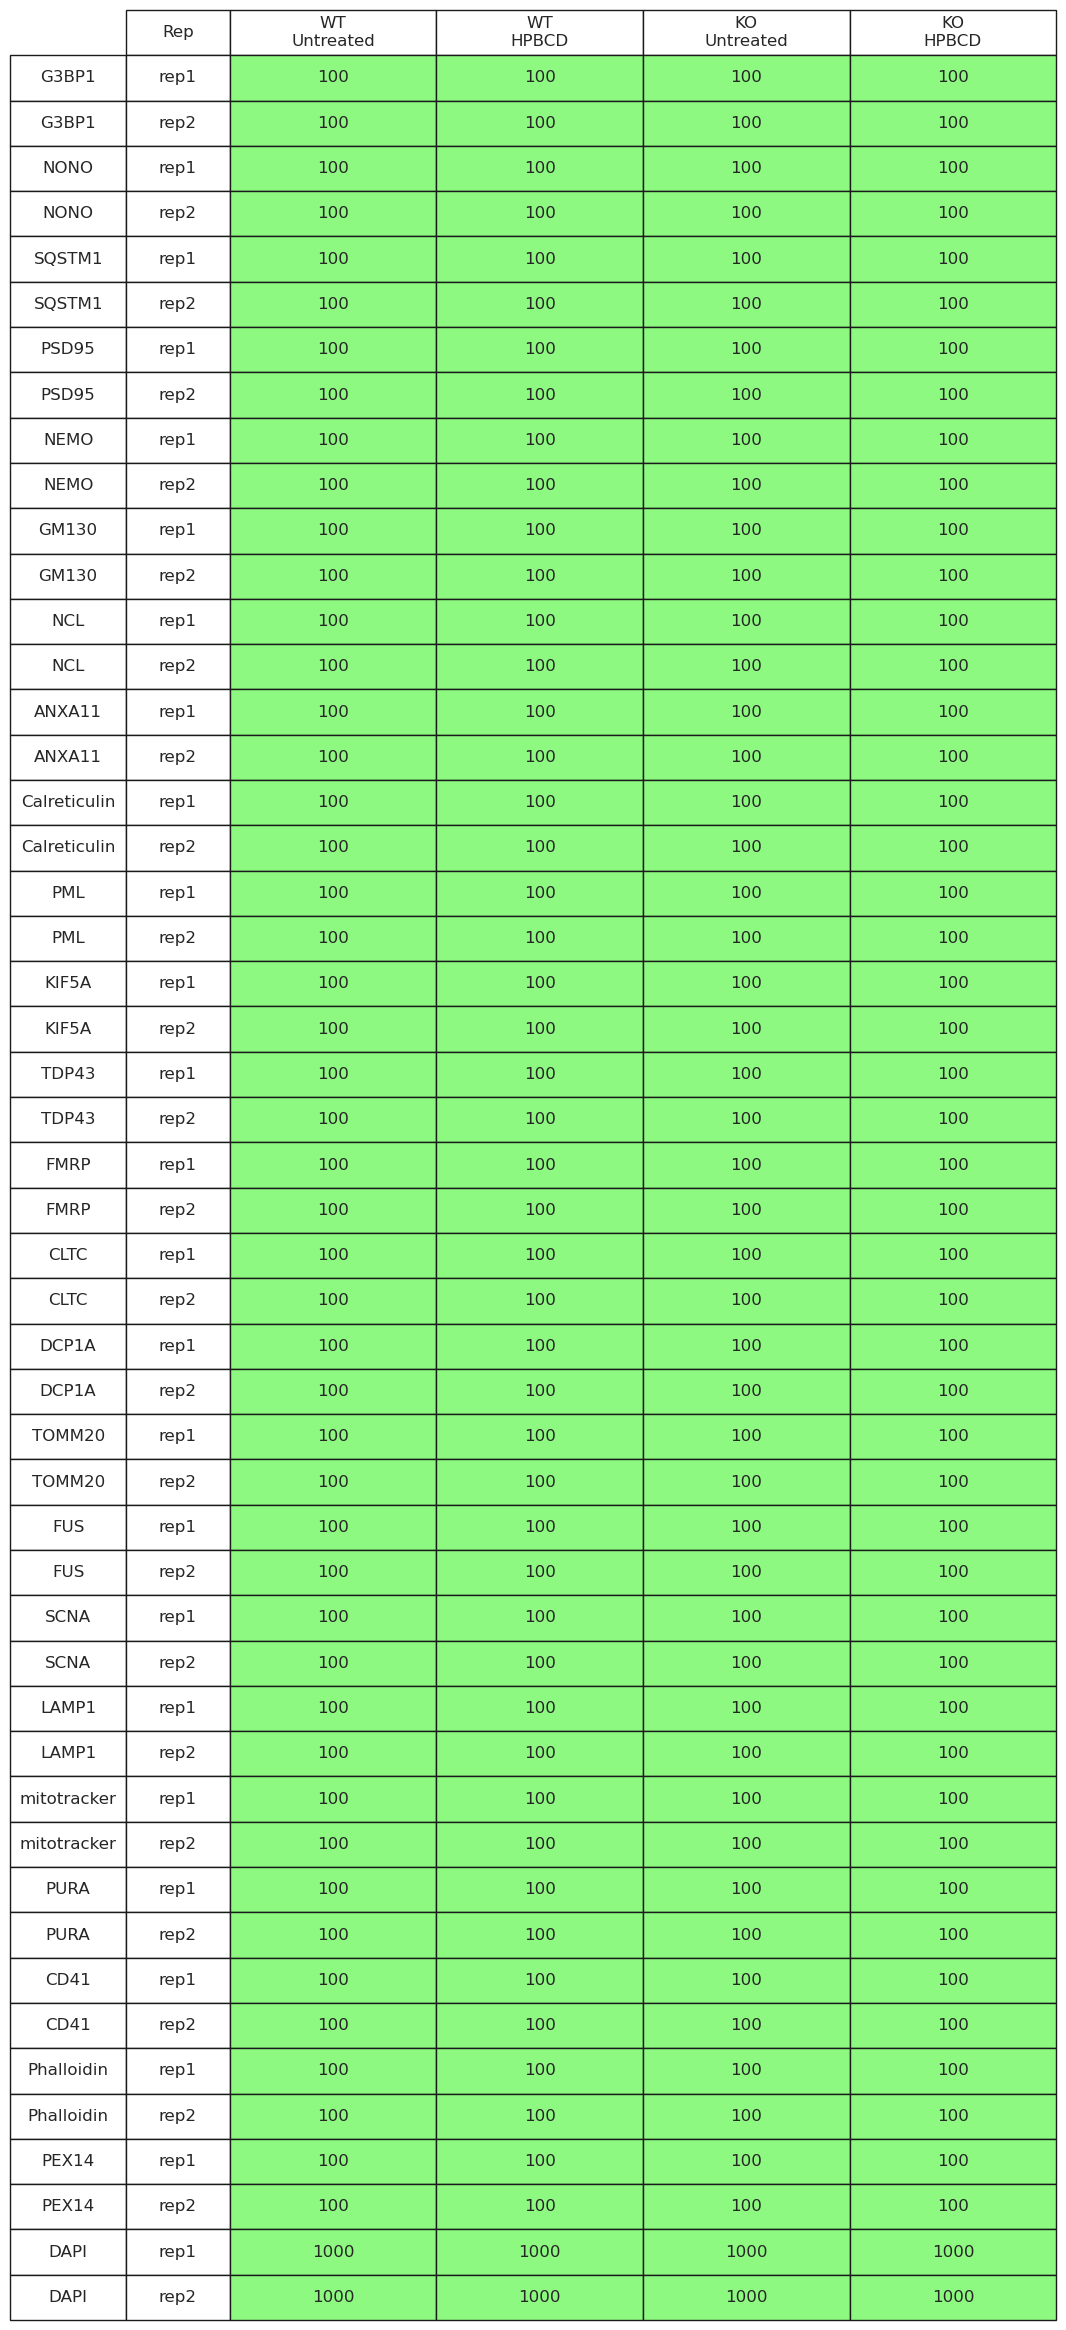

batch4
Folder structure is valid.
All files exists.


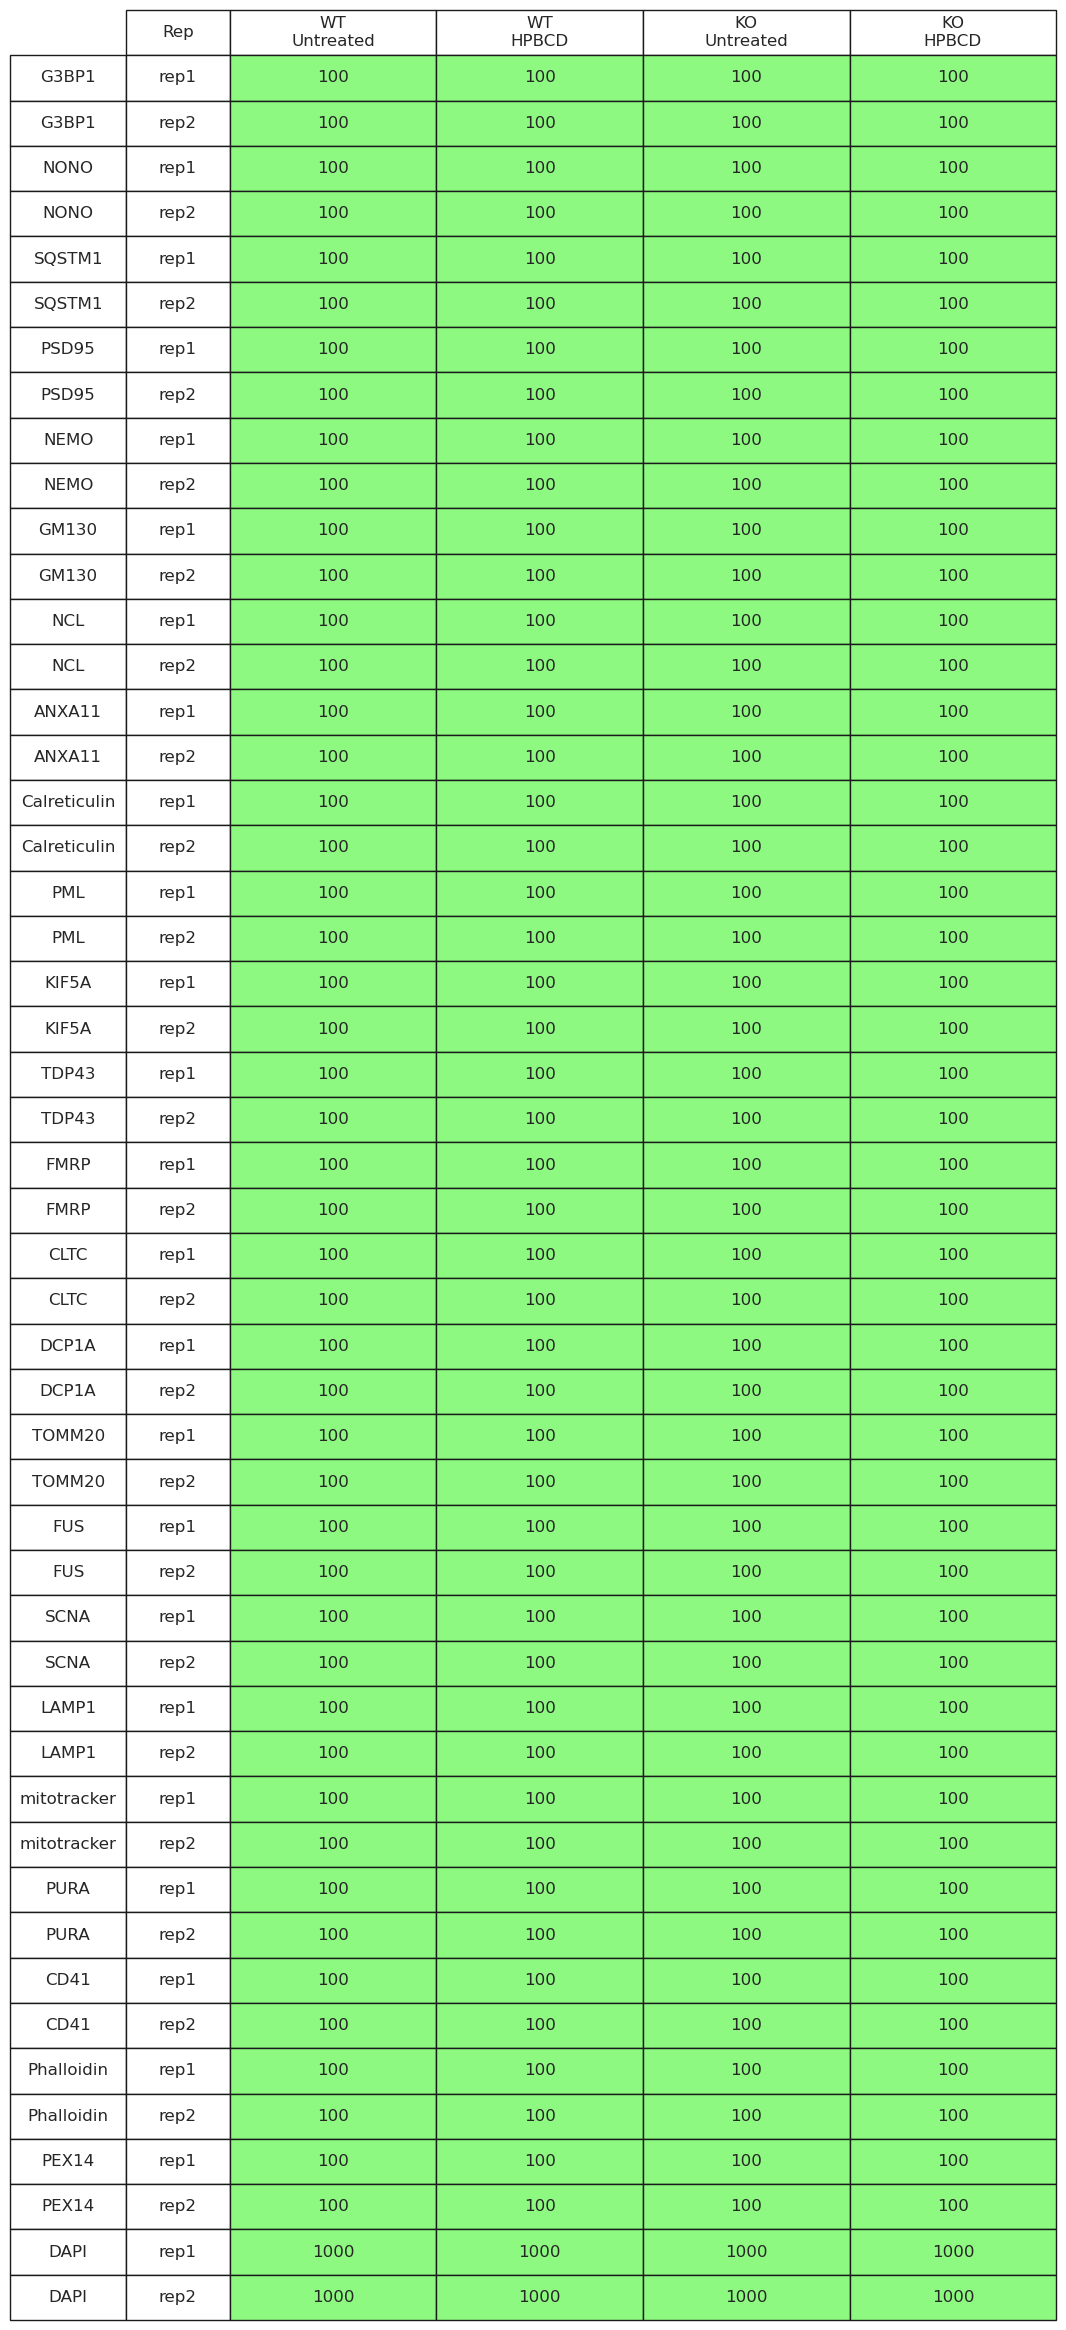

In [17]:

root_directory_raw = os.path.join(MOMAPS_HOME, 'input', 'images', 'raw', 'SpinningDisk','NiemannPick_sort')

raws = run_validate_folder_structure(root_directory_raw, False, np_panels, np_markers,PLOT_PATH,
                                     np_marker_info, np_cell_lines_to_cond, reps, 
                                     np_cell_lines_for_disp,
                                     np_expected_dapi_raw, batches=batches,
                                     fig_width=4, fig_height=10)

### Processed

batch1
Folder structure is valid.
All files exists.


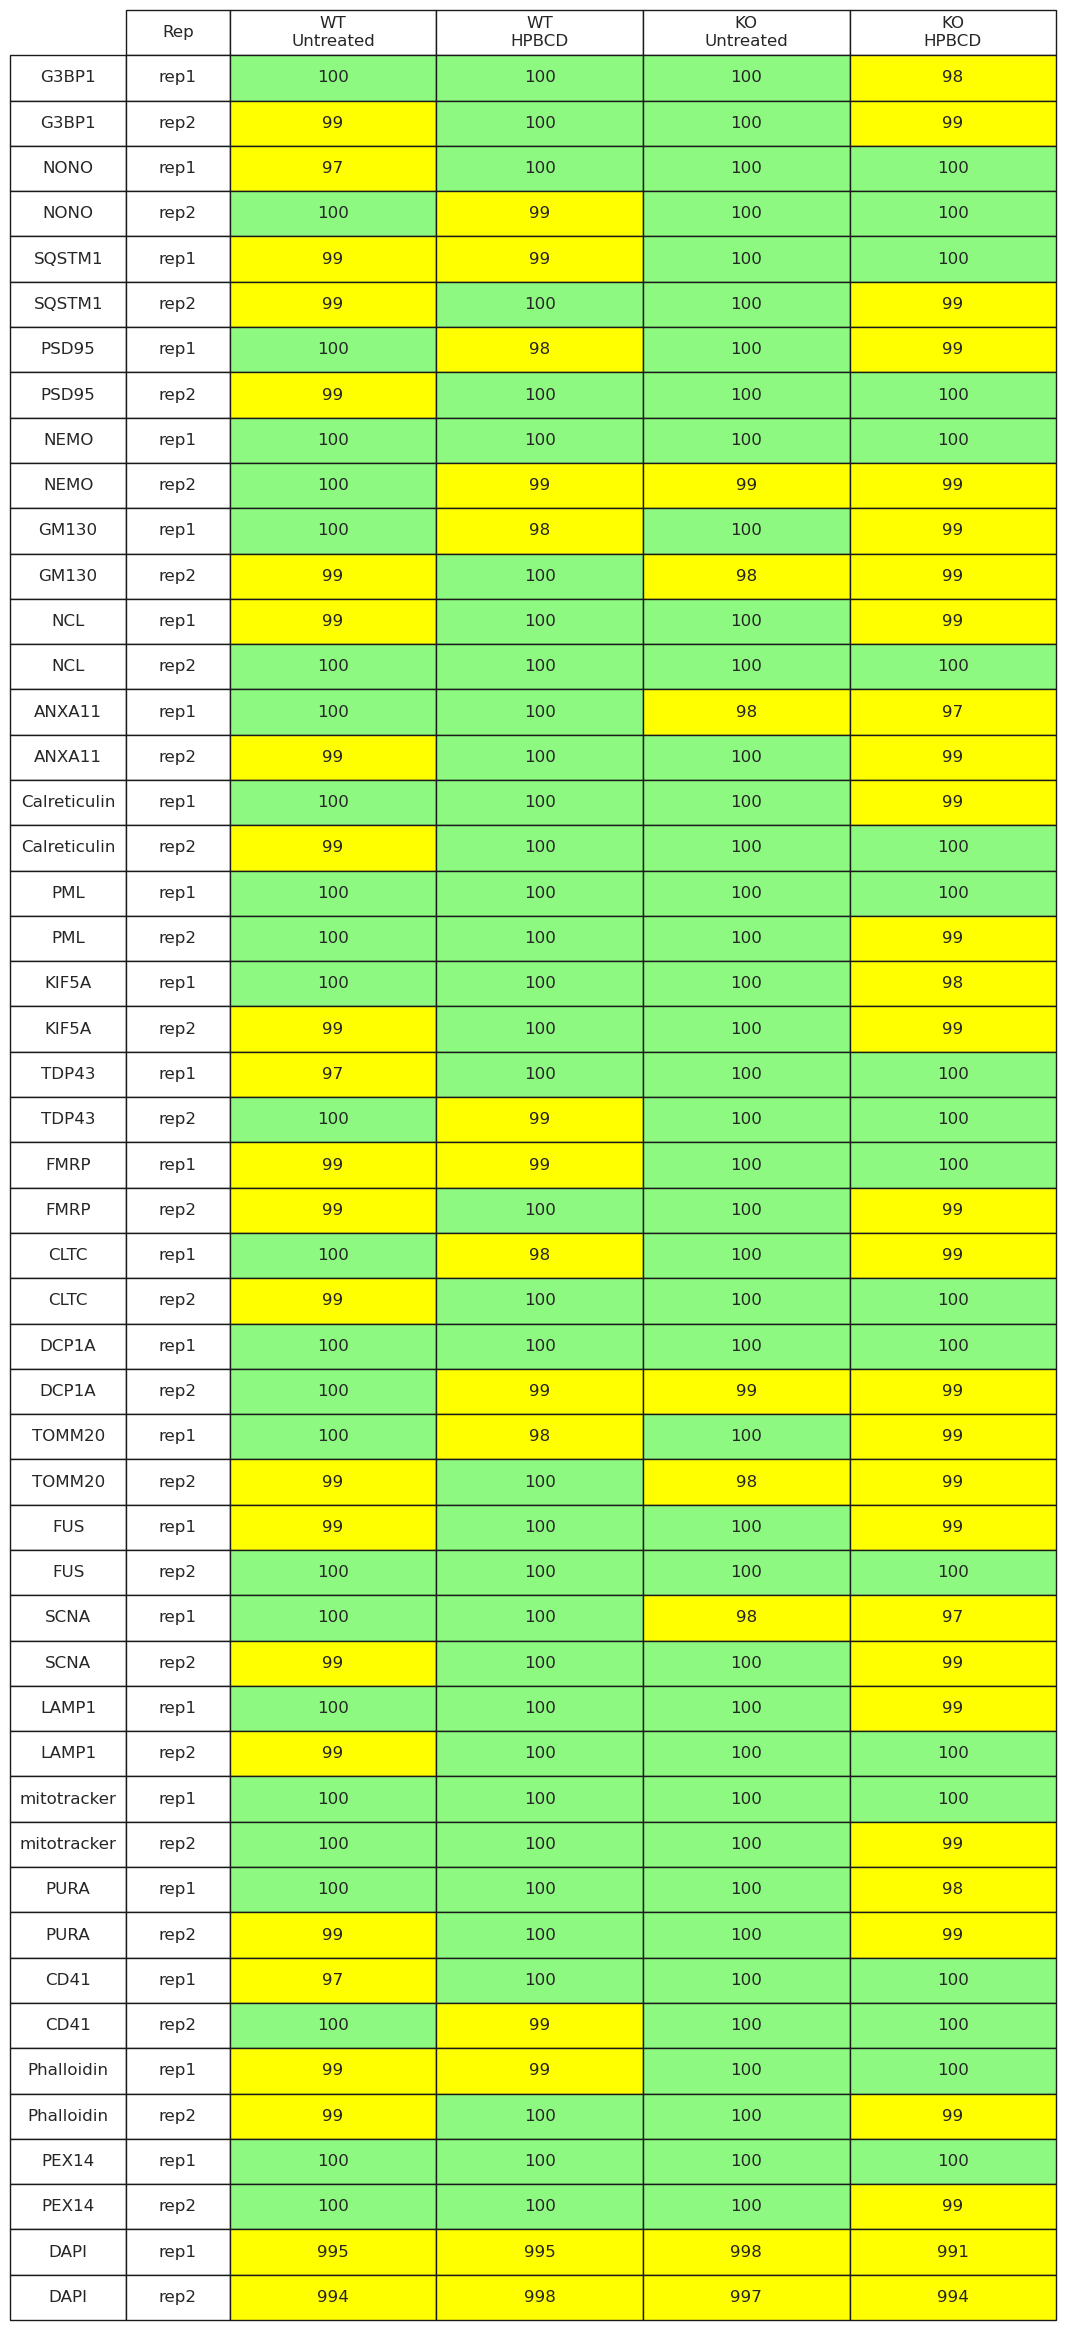

batch2
Folder structure is valid.
All files exists.


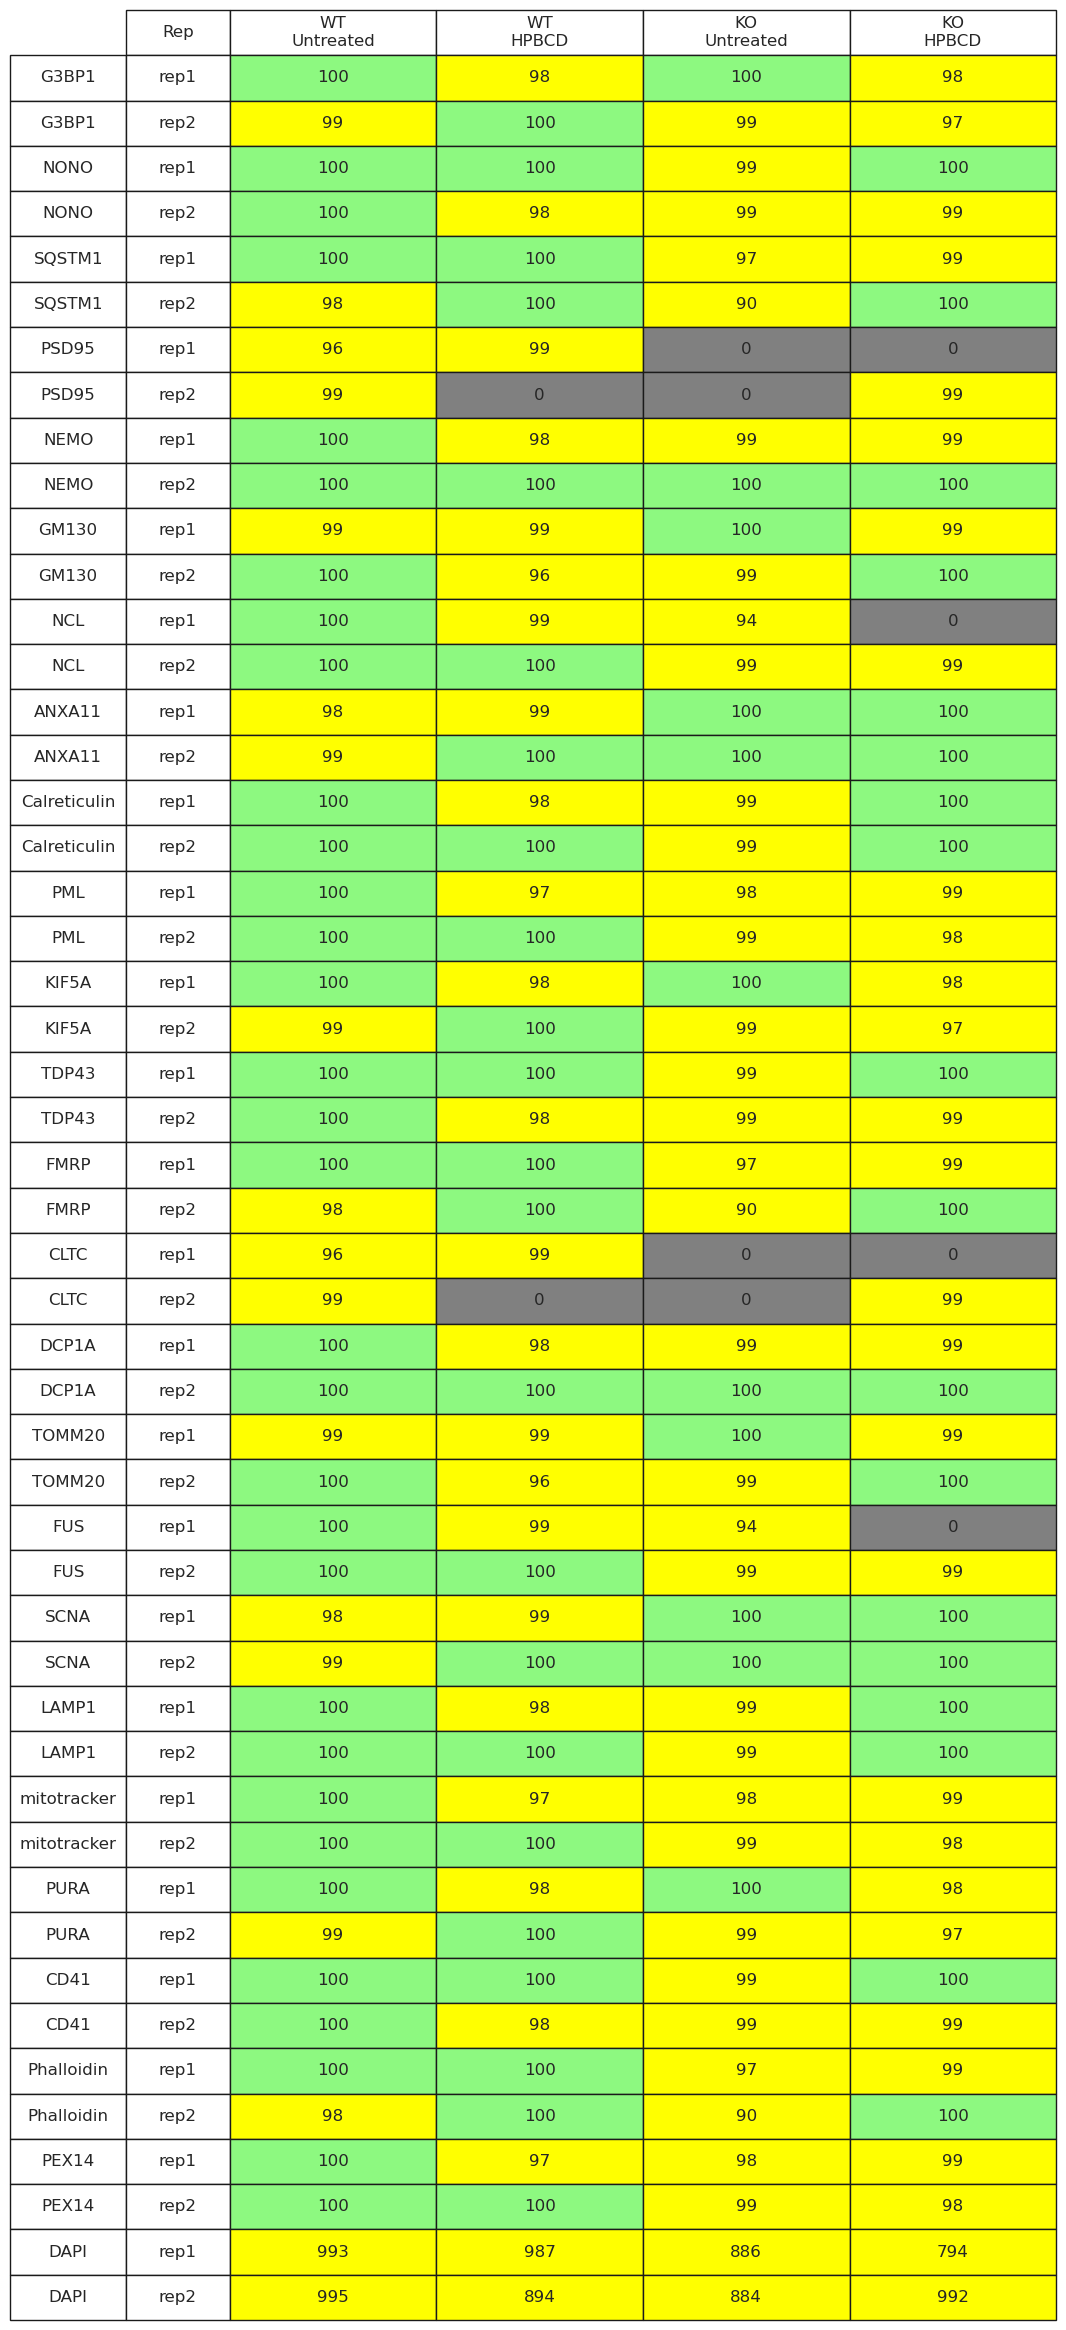

batch3
Folder structure is valid.
All files exists.


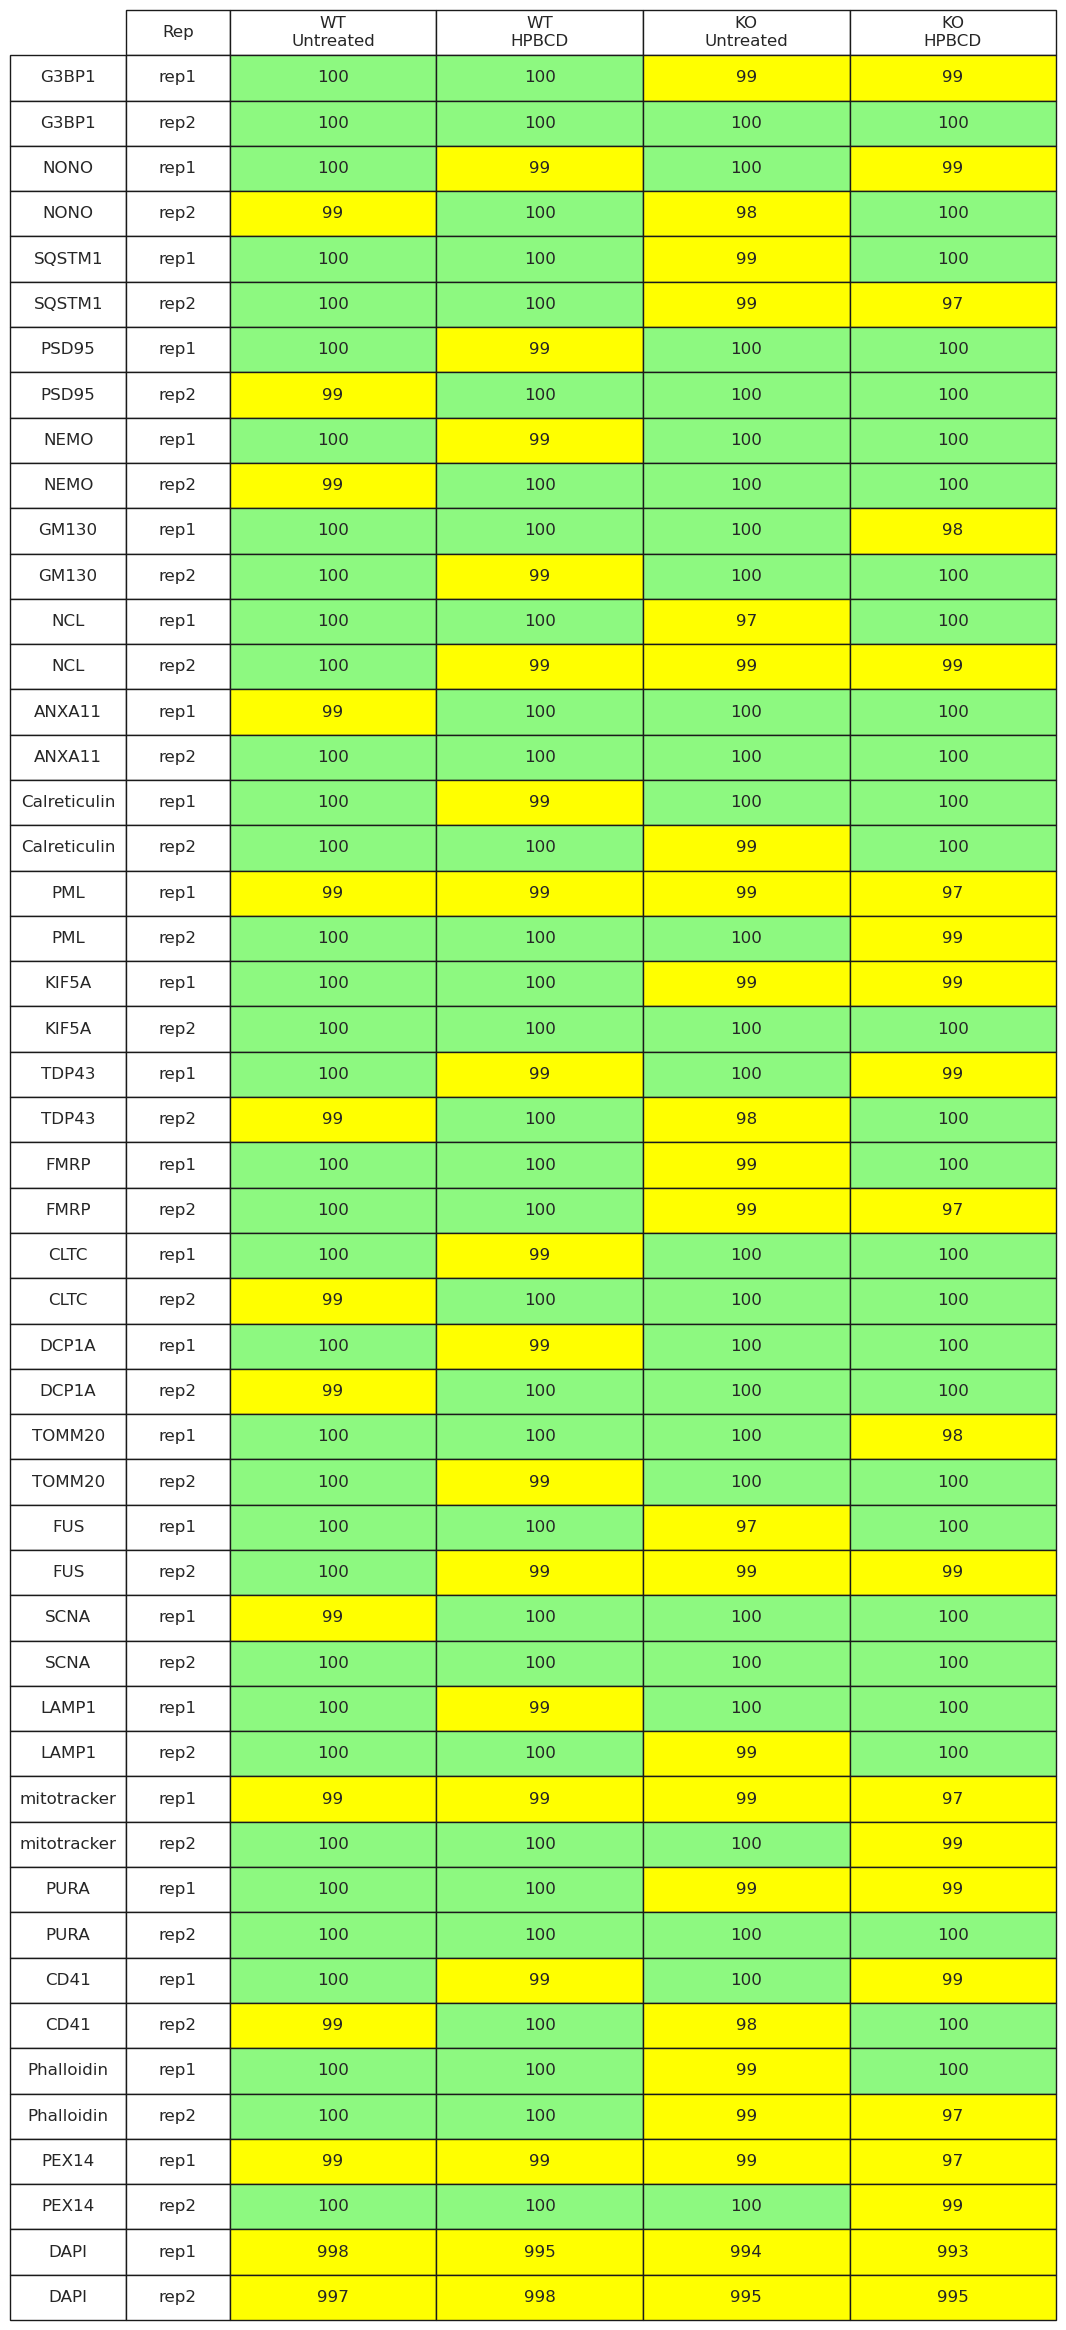

batch4
Folder structure is valid.
All files exists.


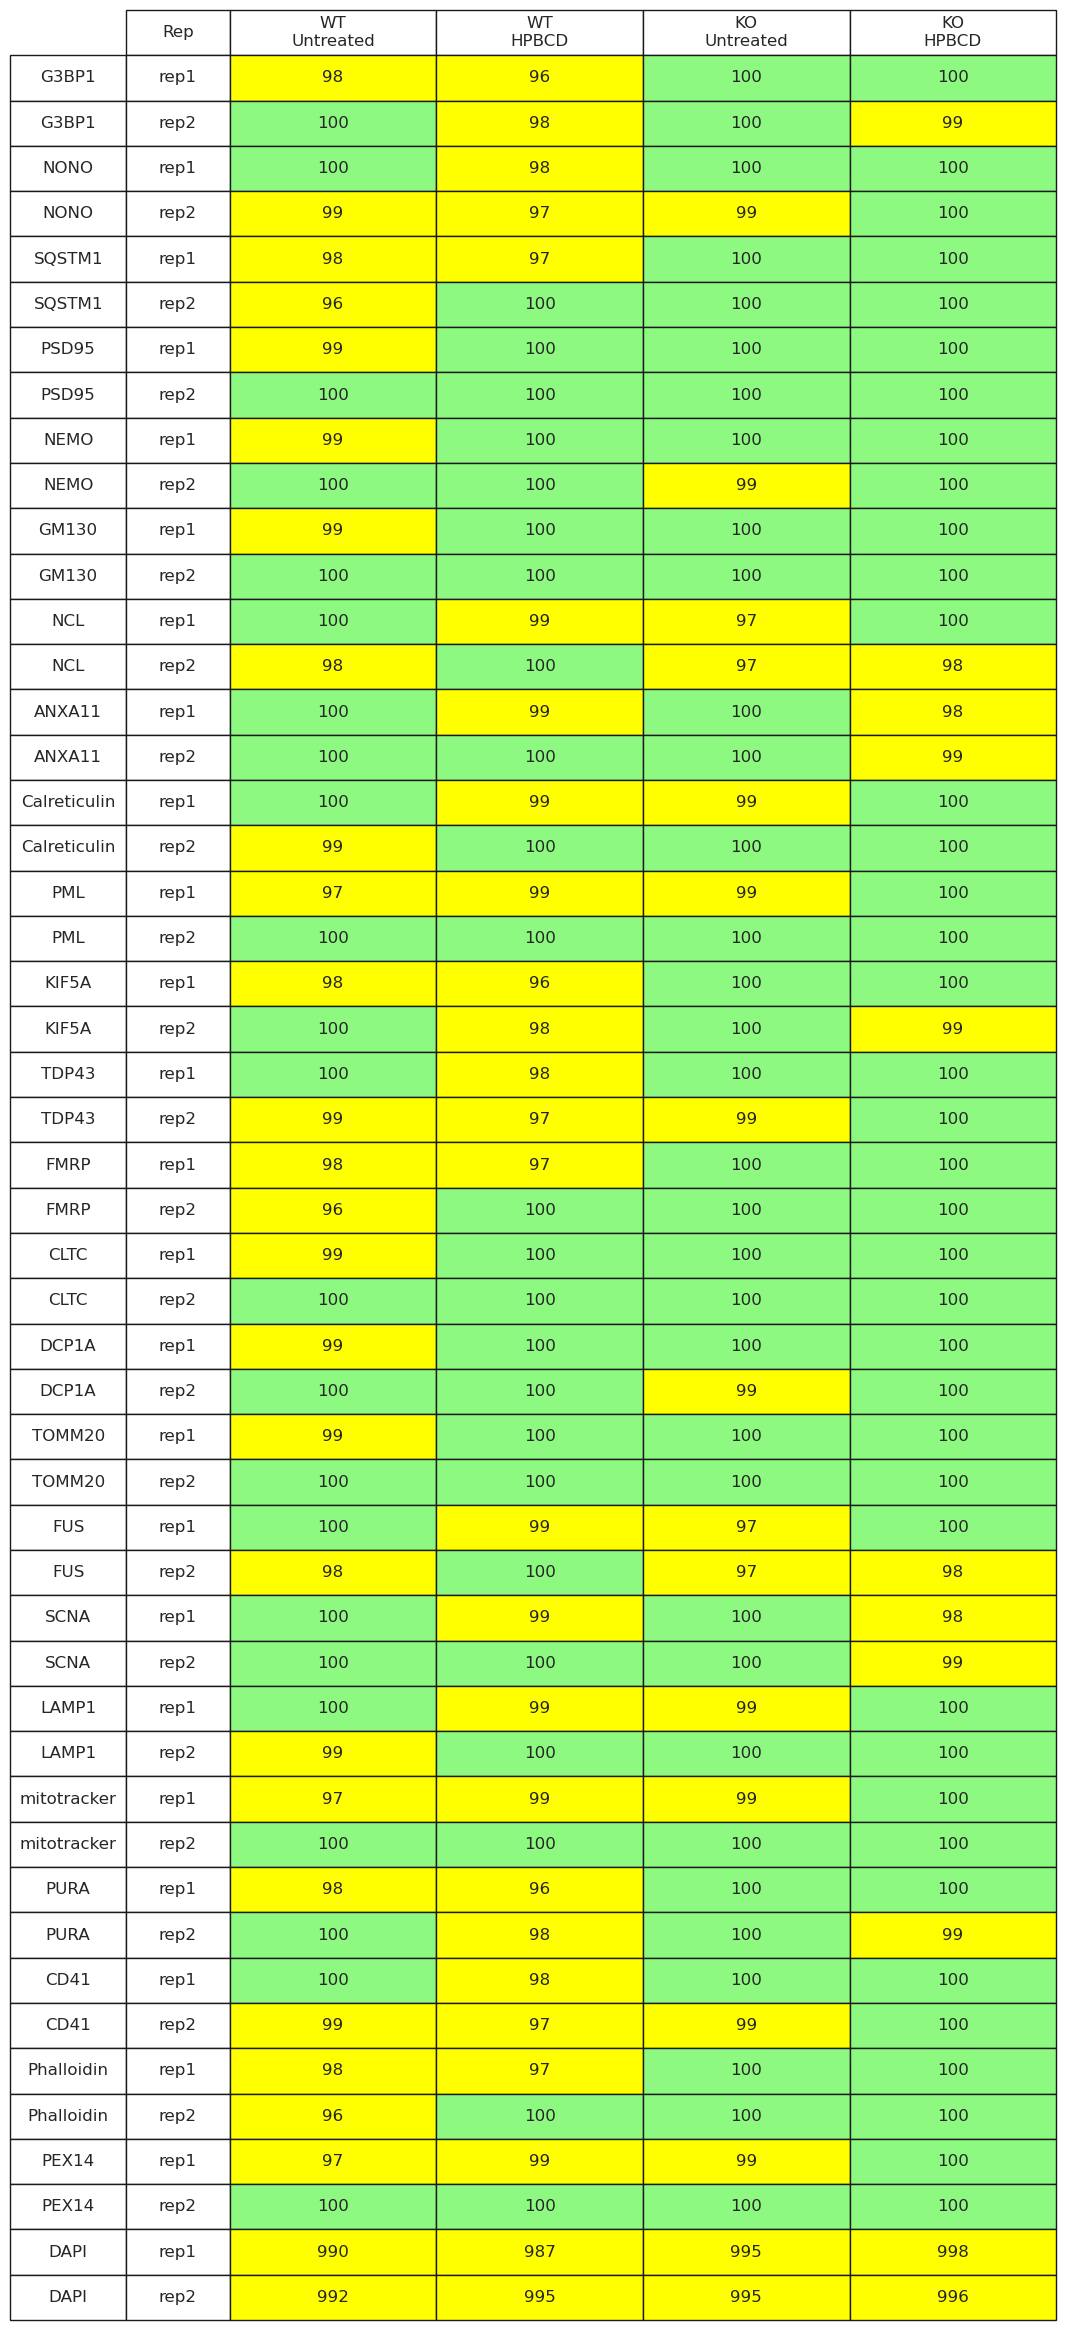

In [19]:
root_directory_proc = os.path.join(MOMAPS_HOME, 'input', 'images', 'processed', 'spd2',
                              'SpinningDisk','NiemannPick')
procs = run_validate_folder_structure(root_directory_proc, True, np_panels, 
                                      np_markers,PLOT_PATH,
                                     np_marker_info, np_cell_lines_to_cond, reps, 
                                      np_cell_lines_for_disp,
                                     np_expected_dapi_raw, batches=batches, 
                                      fig_width=4, fig_height=10)

### Difference between Raw and Processed

batch1


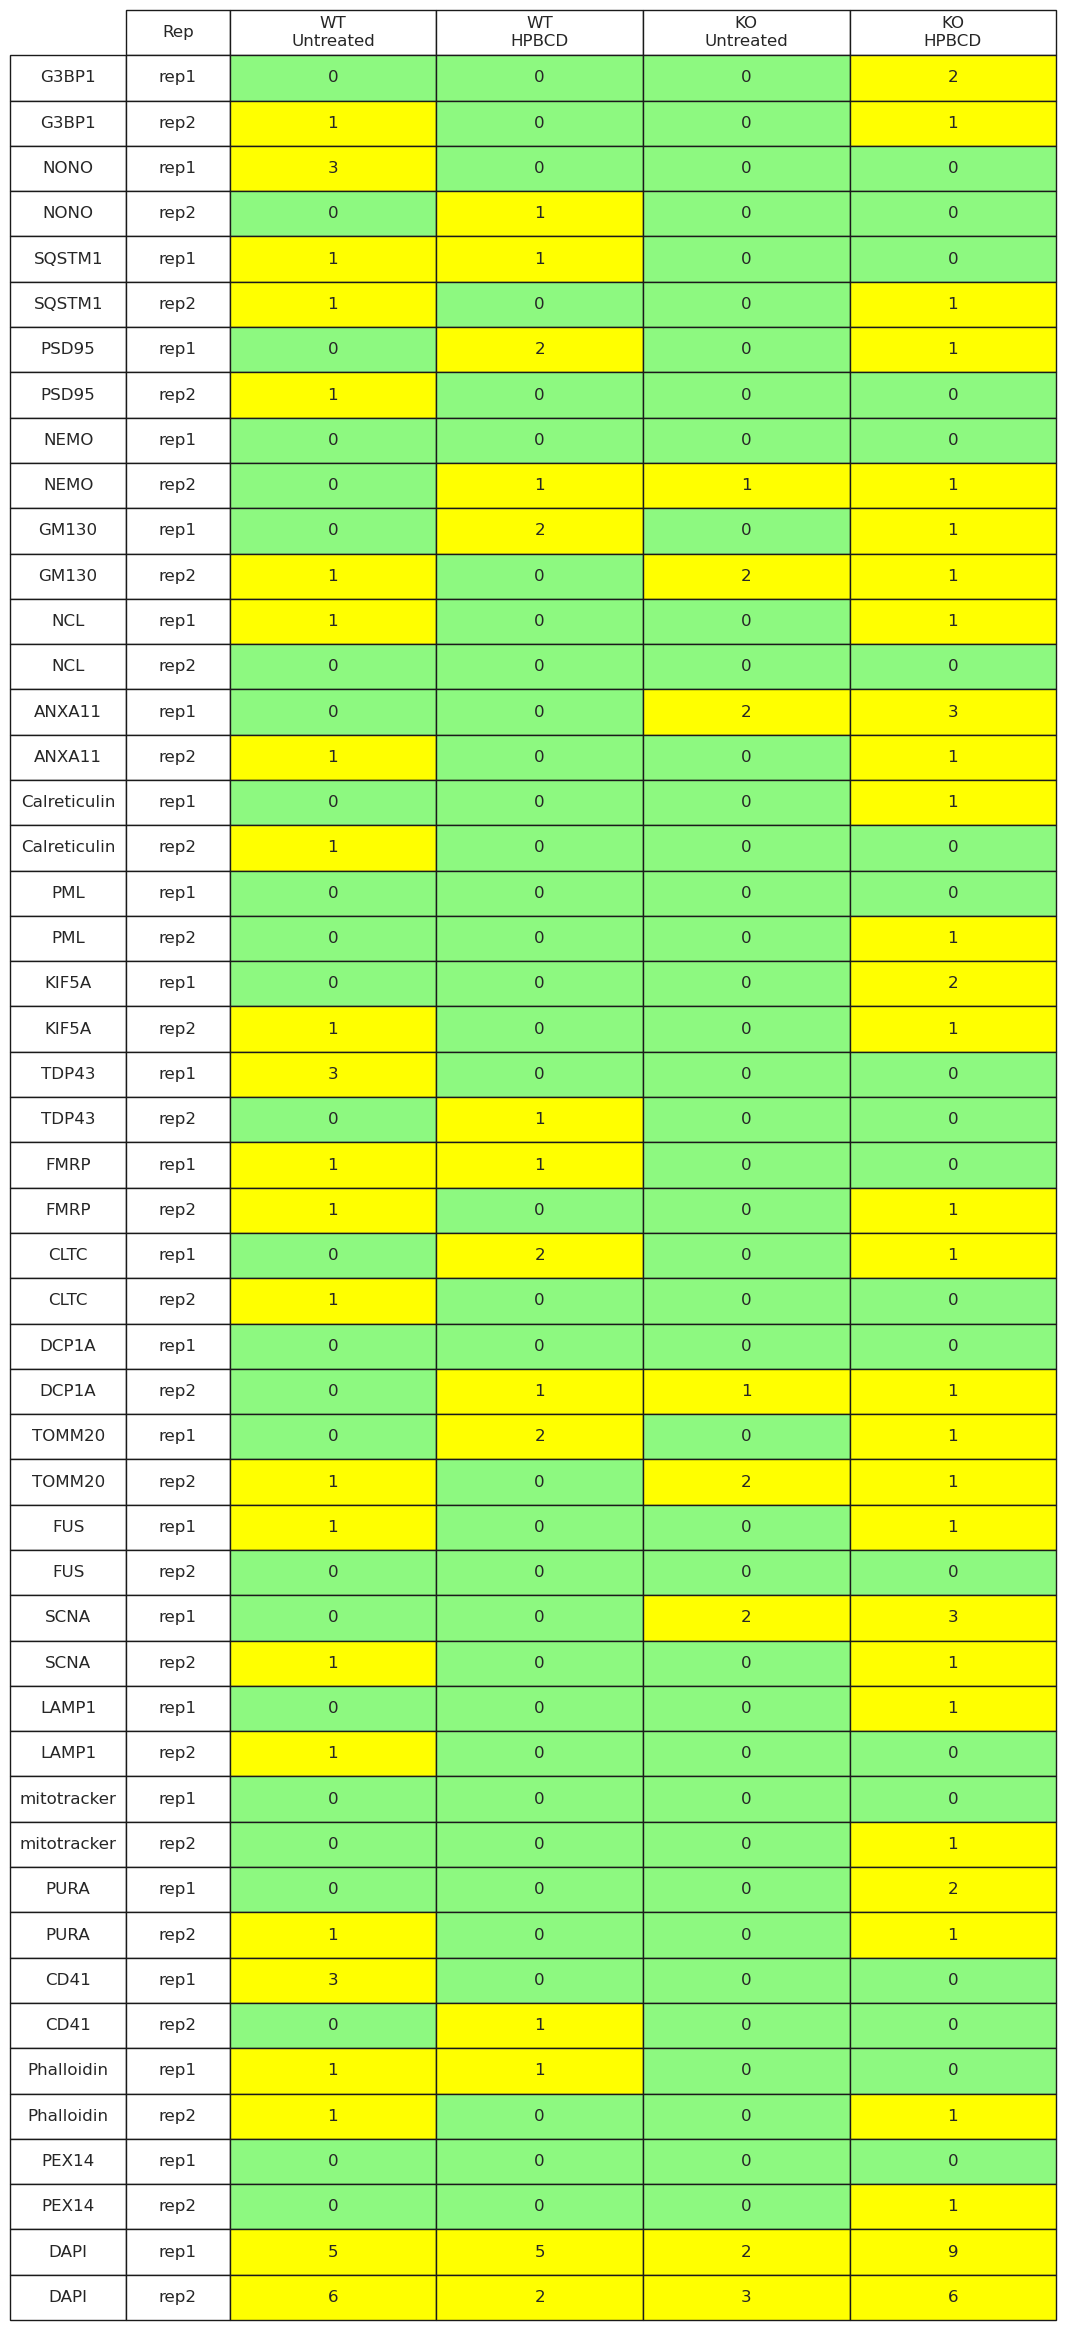

batch2


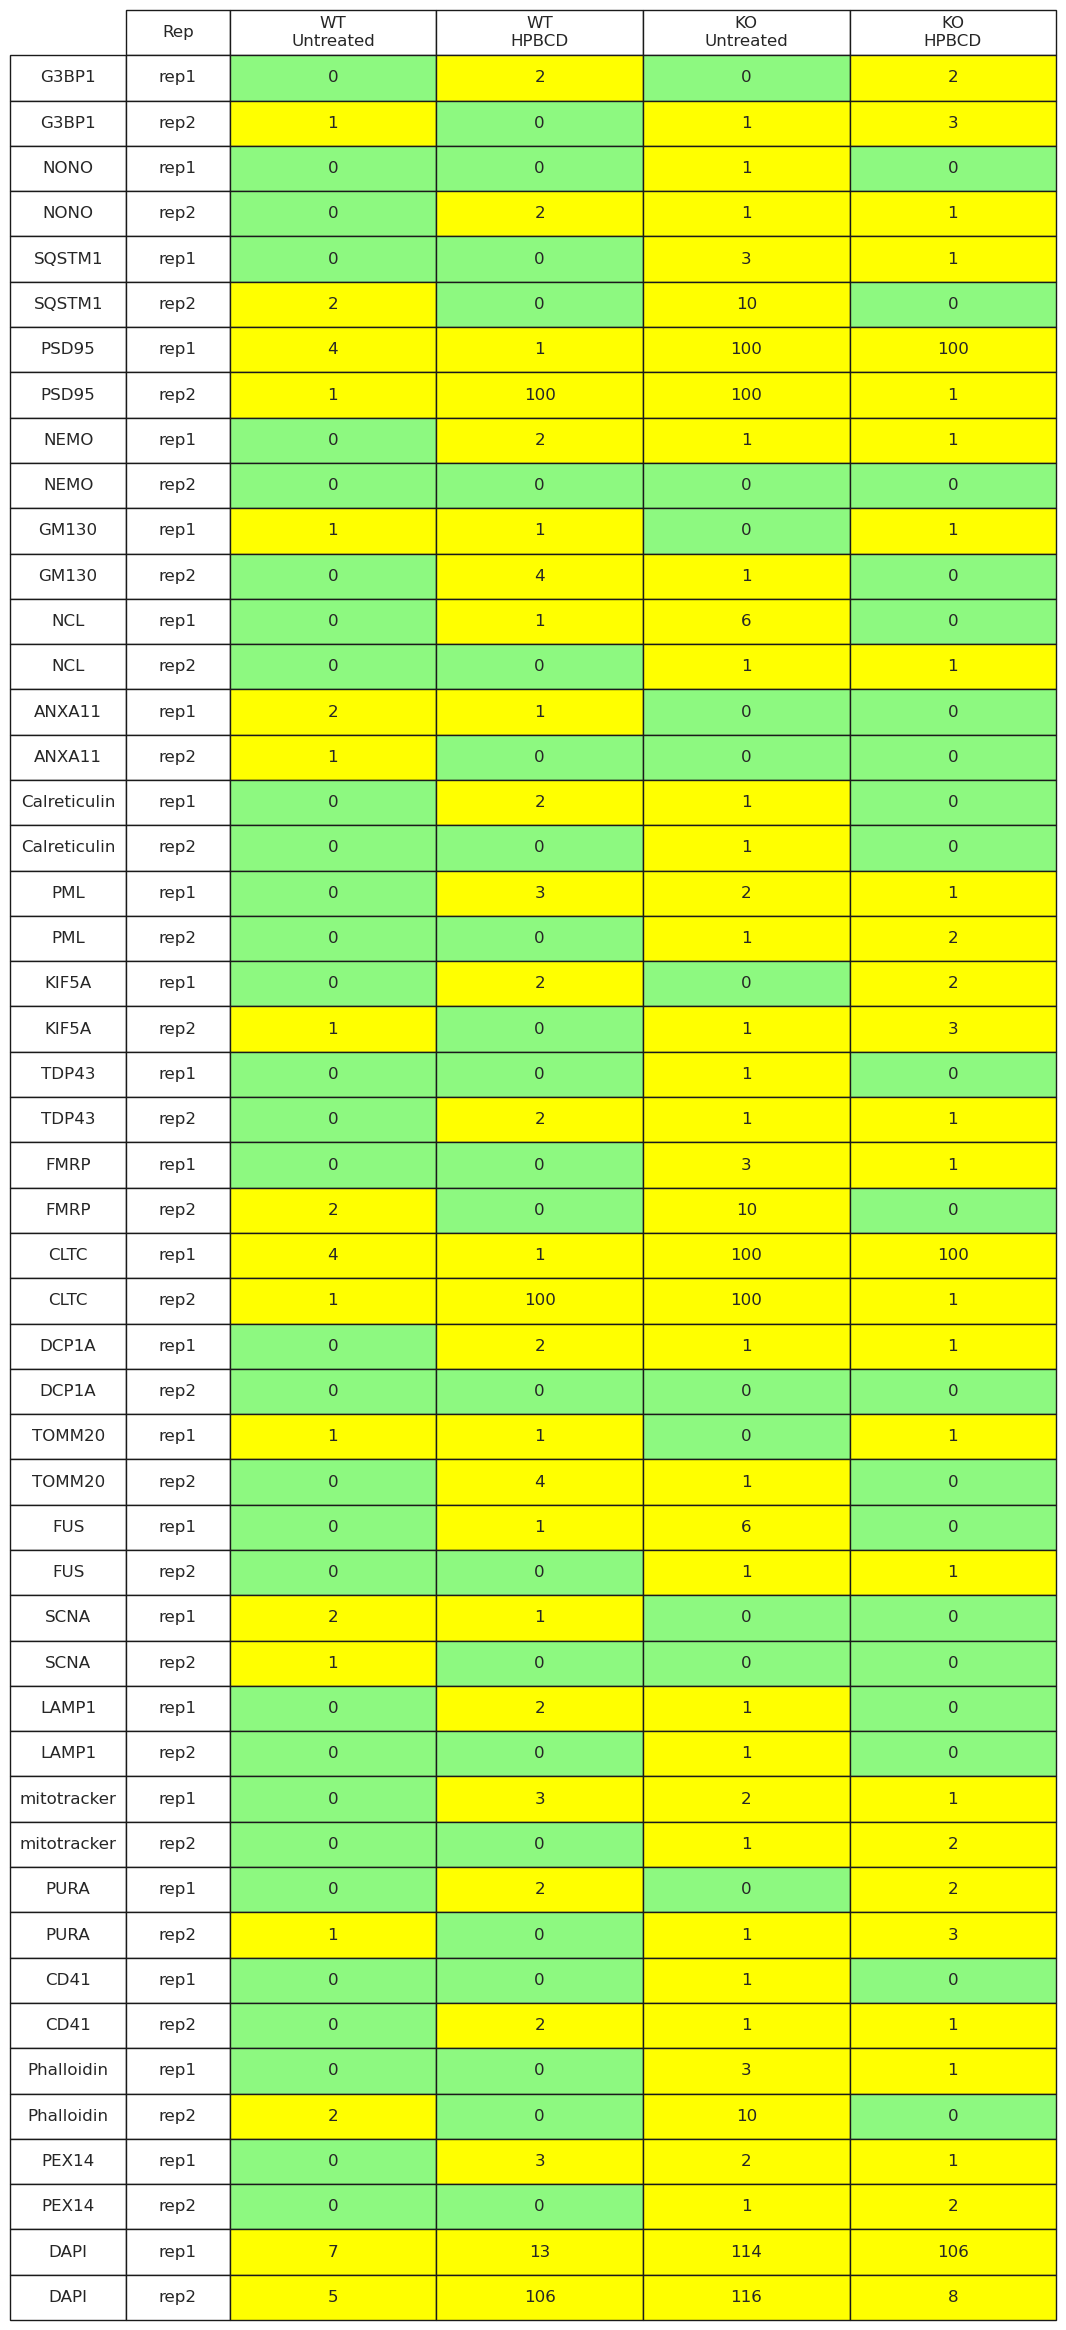

batch3


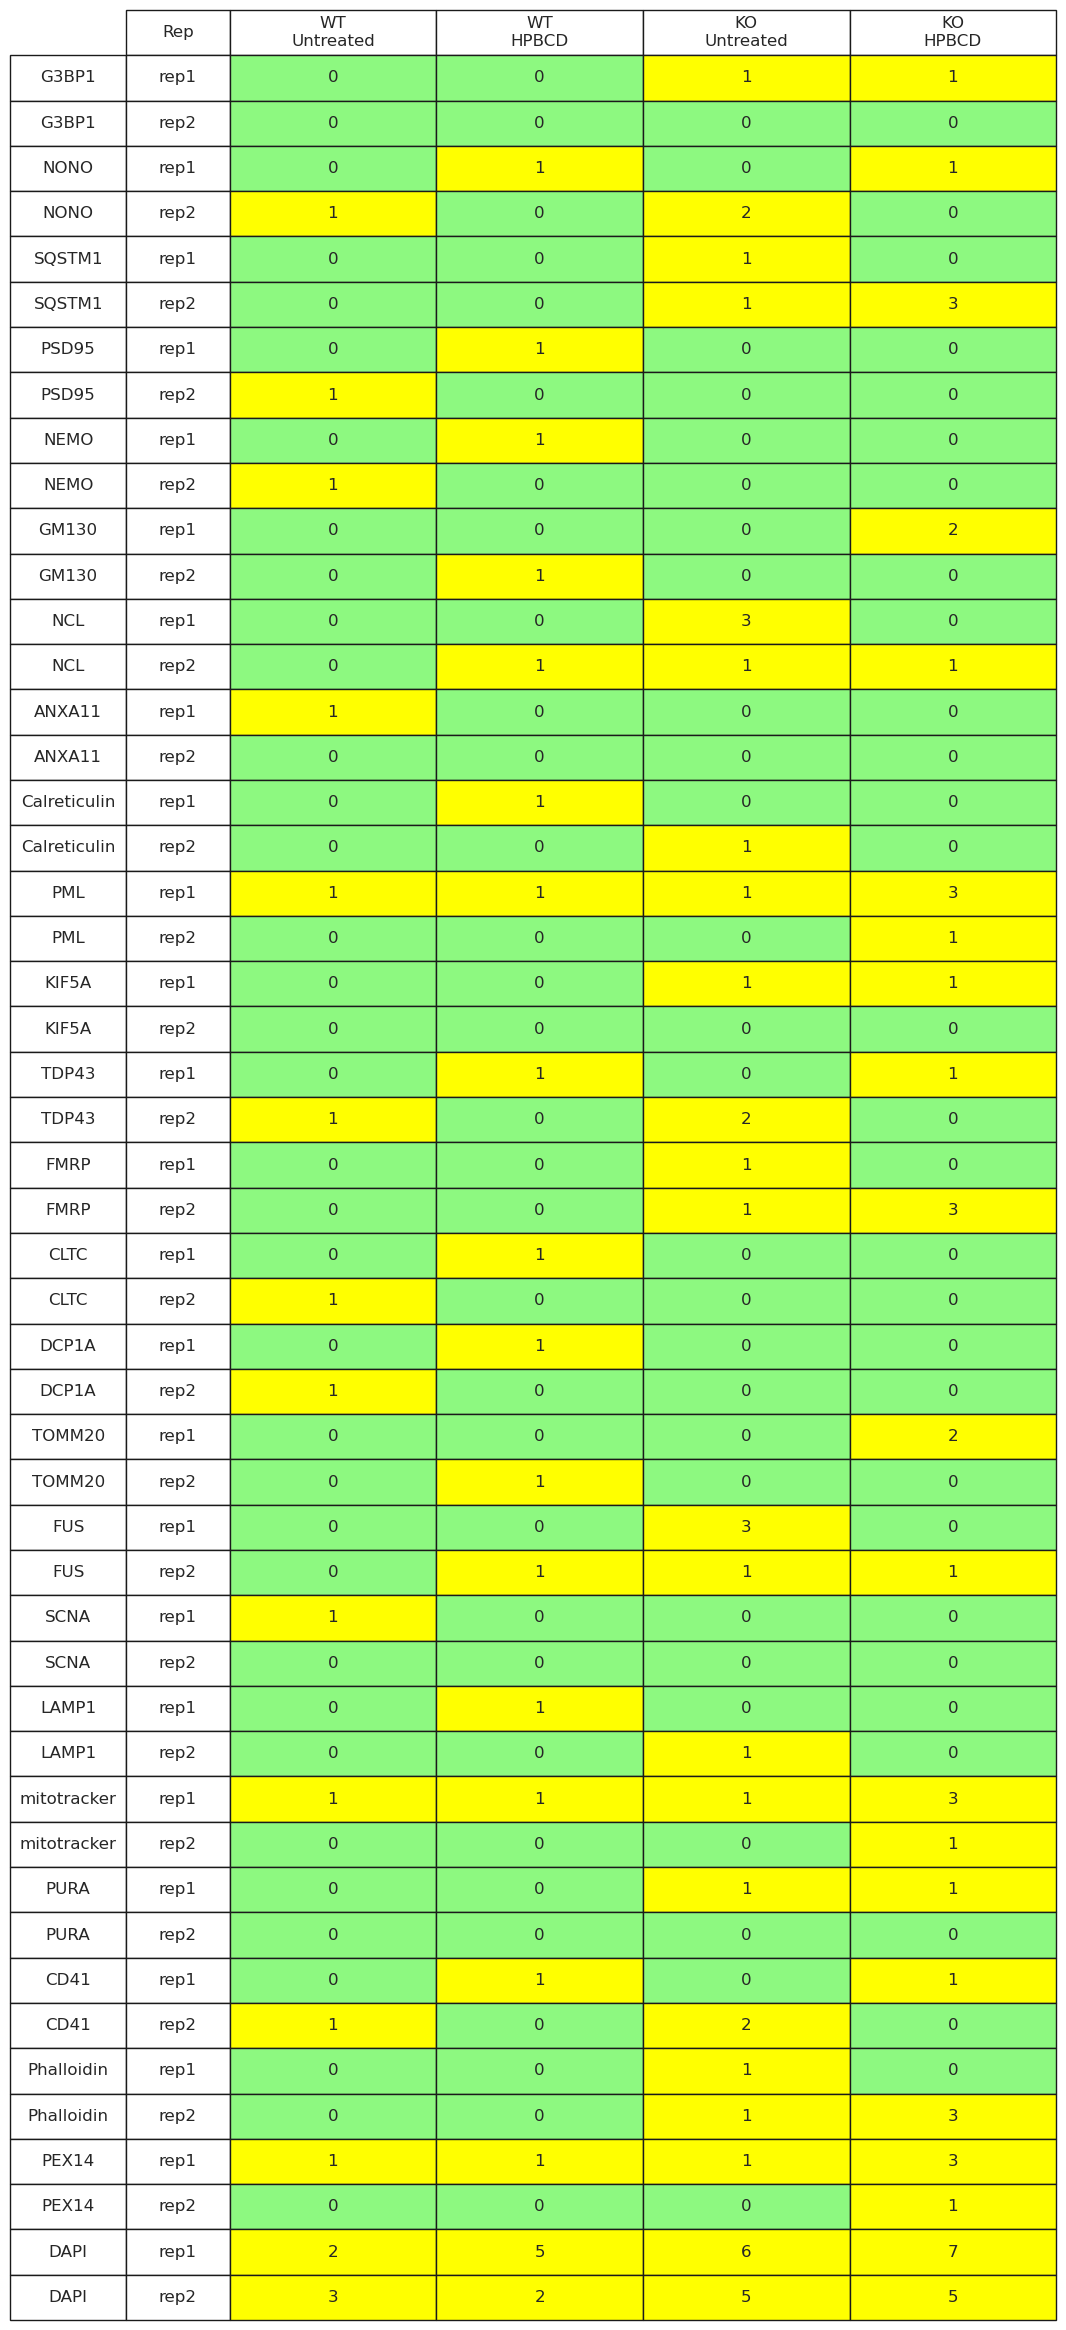

batch4


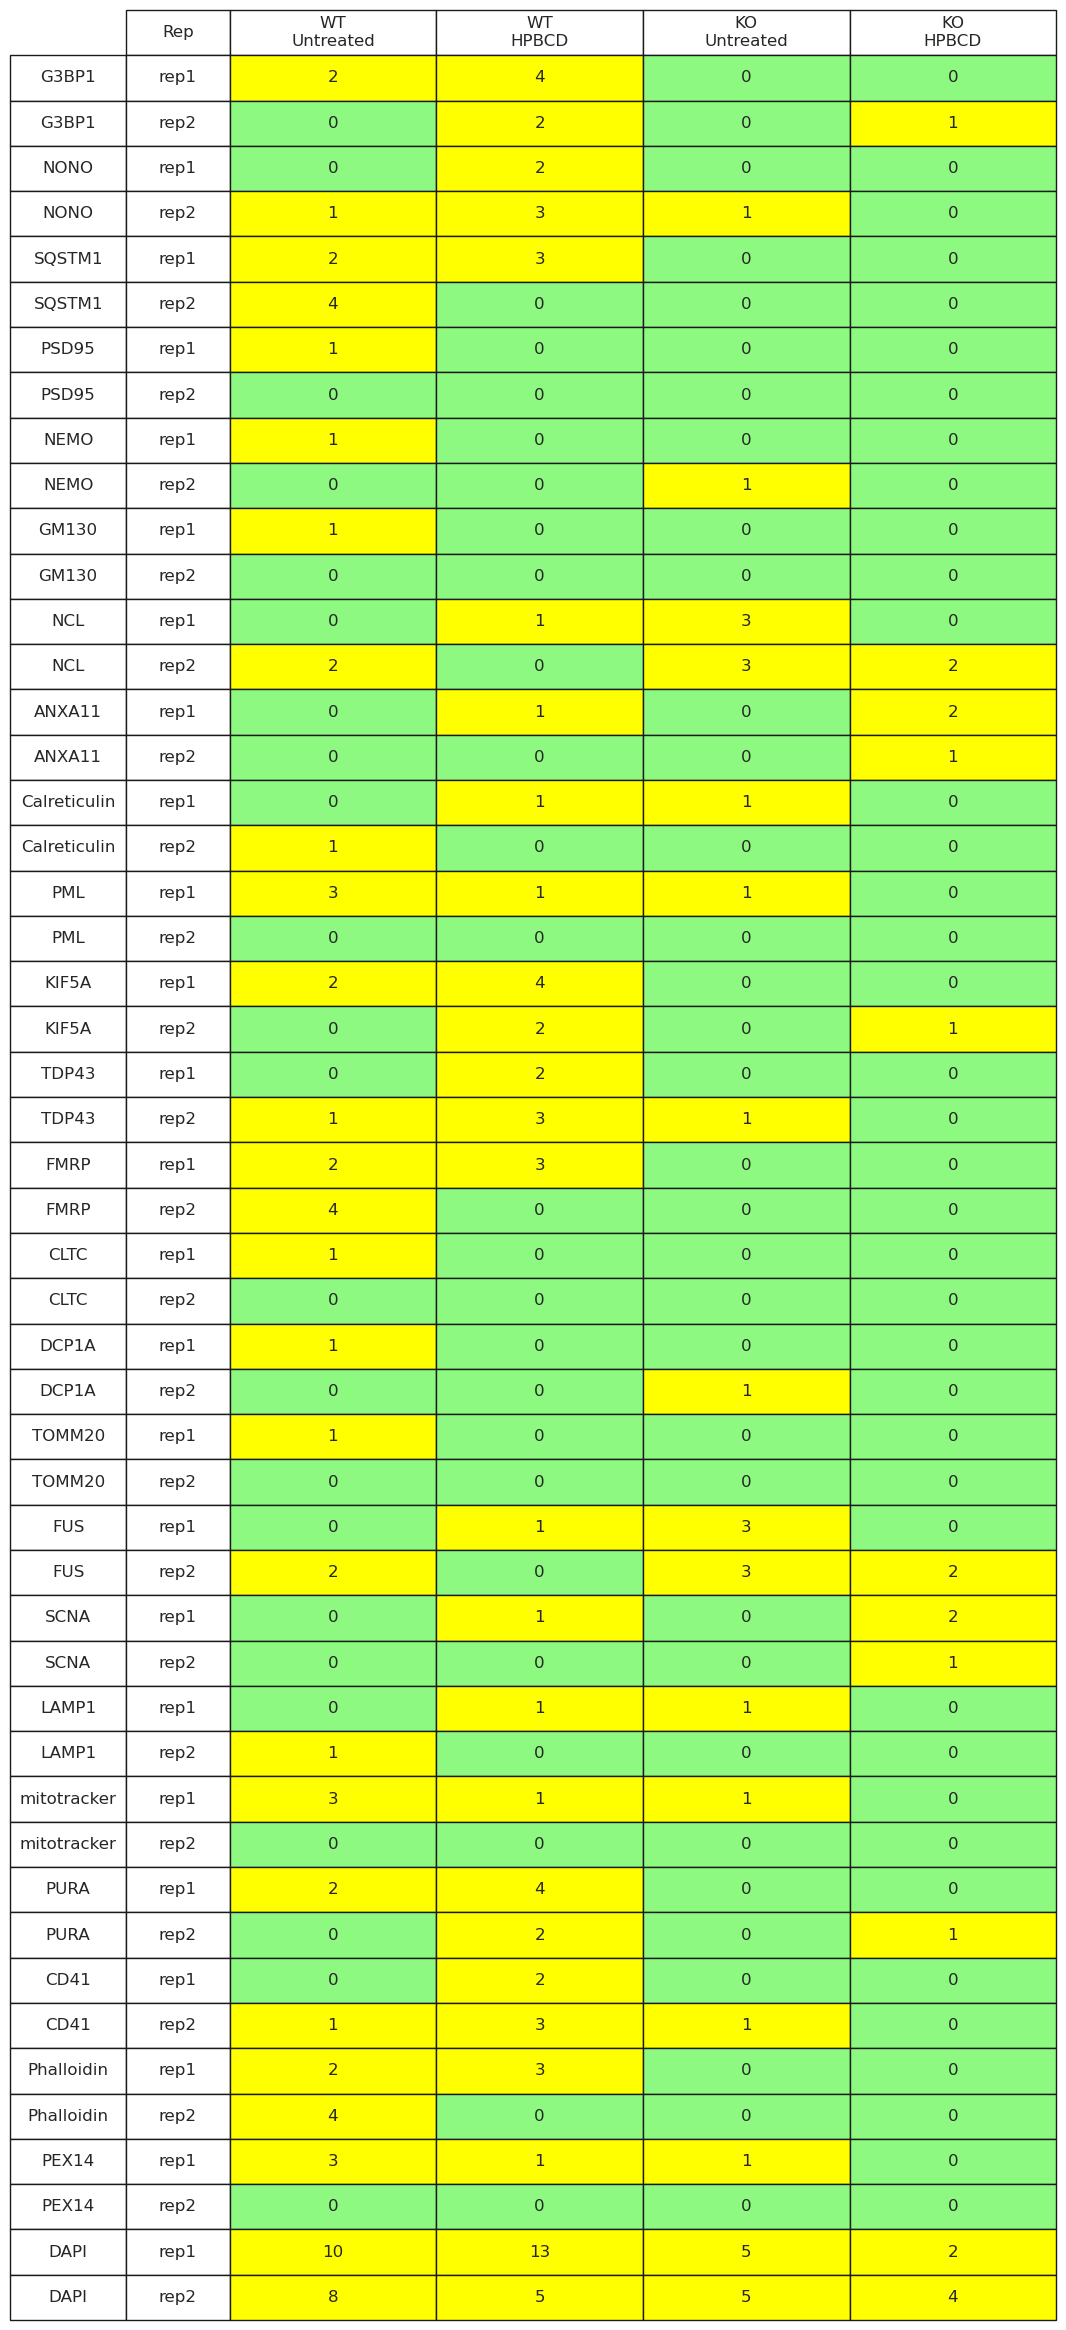

In [20]:
display_diff(batches, raws, procs, PLOT_PATH, 10,4)

In [23]:
for batch in batches:
    with contextlib.redirect_stdout(io.StringIO()):
        var = sample_and_calc_variance(root_directory_proc, batch, 
                                       sample_size_per_markers=200, num_markers=len(np_markers))
    print(f'{batch} var: ',var)
    

batch1 var:  0.009317273822793421
batch2 var:  0.009025928996653996
batch3 var:  0.009161027456512138
batch4 var:  0.009126230755765687



# <font color='red'>Number of sites in each batch and cell line </font>


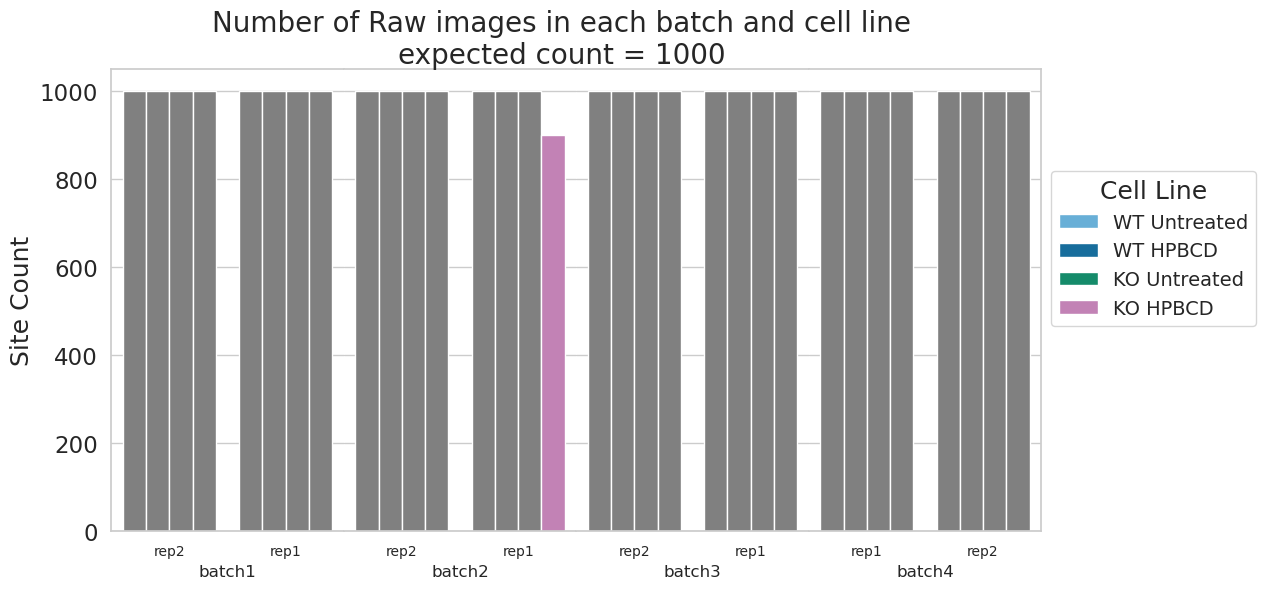

In [25]:
plot_sites_count(df, np_expected_raw, np_lines_order, np_custom_palette, split_to_reps=True)

# <font color='red'>Number of Cells in Site for each batch and cell line </font>

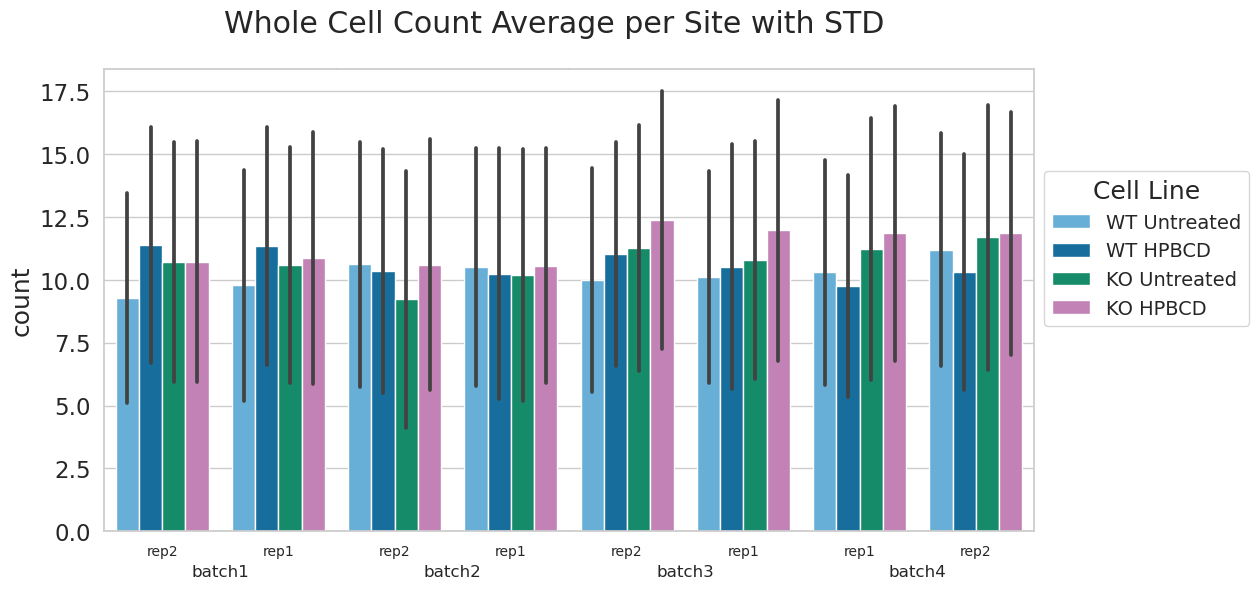

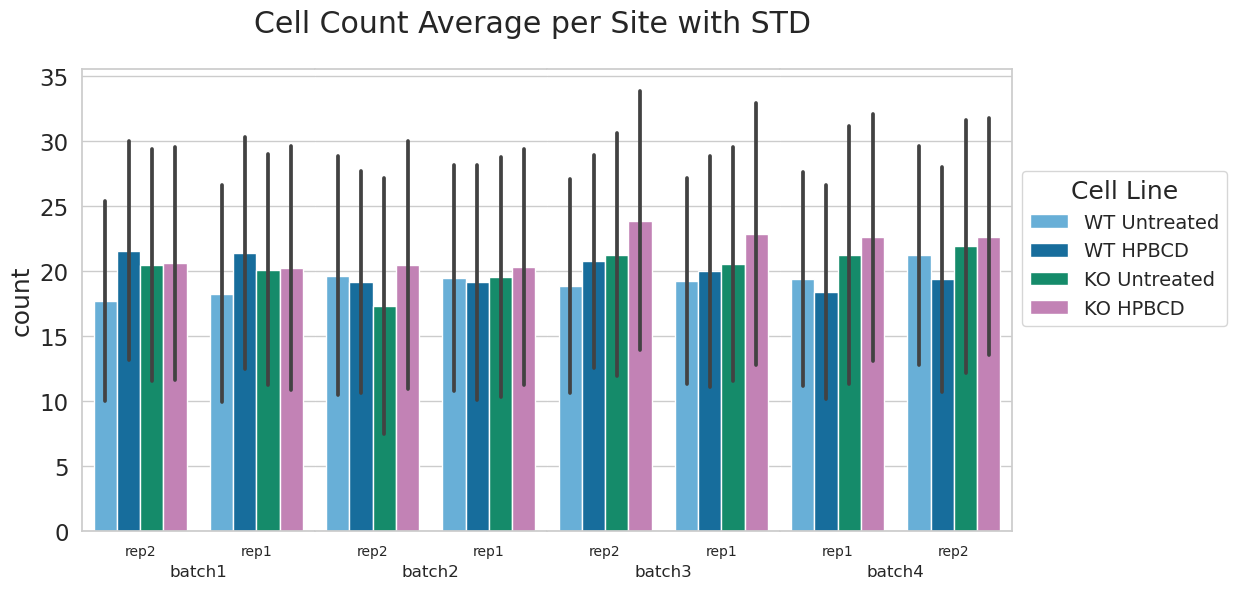

In [26]:
df_no_empty_sites = df[df.n_valid_tiles !=0]
plot_cell_count(df_no_empty_sites, np_lines_order, np_custom_palette, whole_cells=True)

plot_cell_count(df_no_empty_sites, np_lines_order, np_custom_palette, whole_cells=False)

# can add norm=True to norm by max


# <font color='blue'>number of valid tiles per image (site)</font>


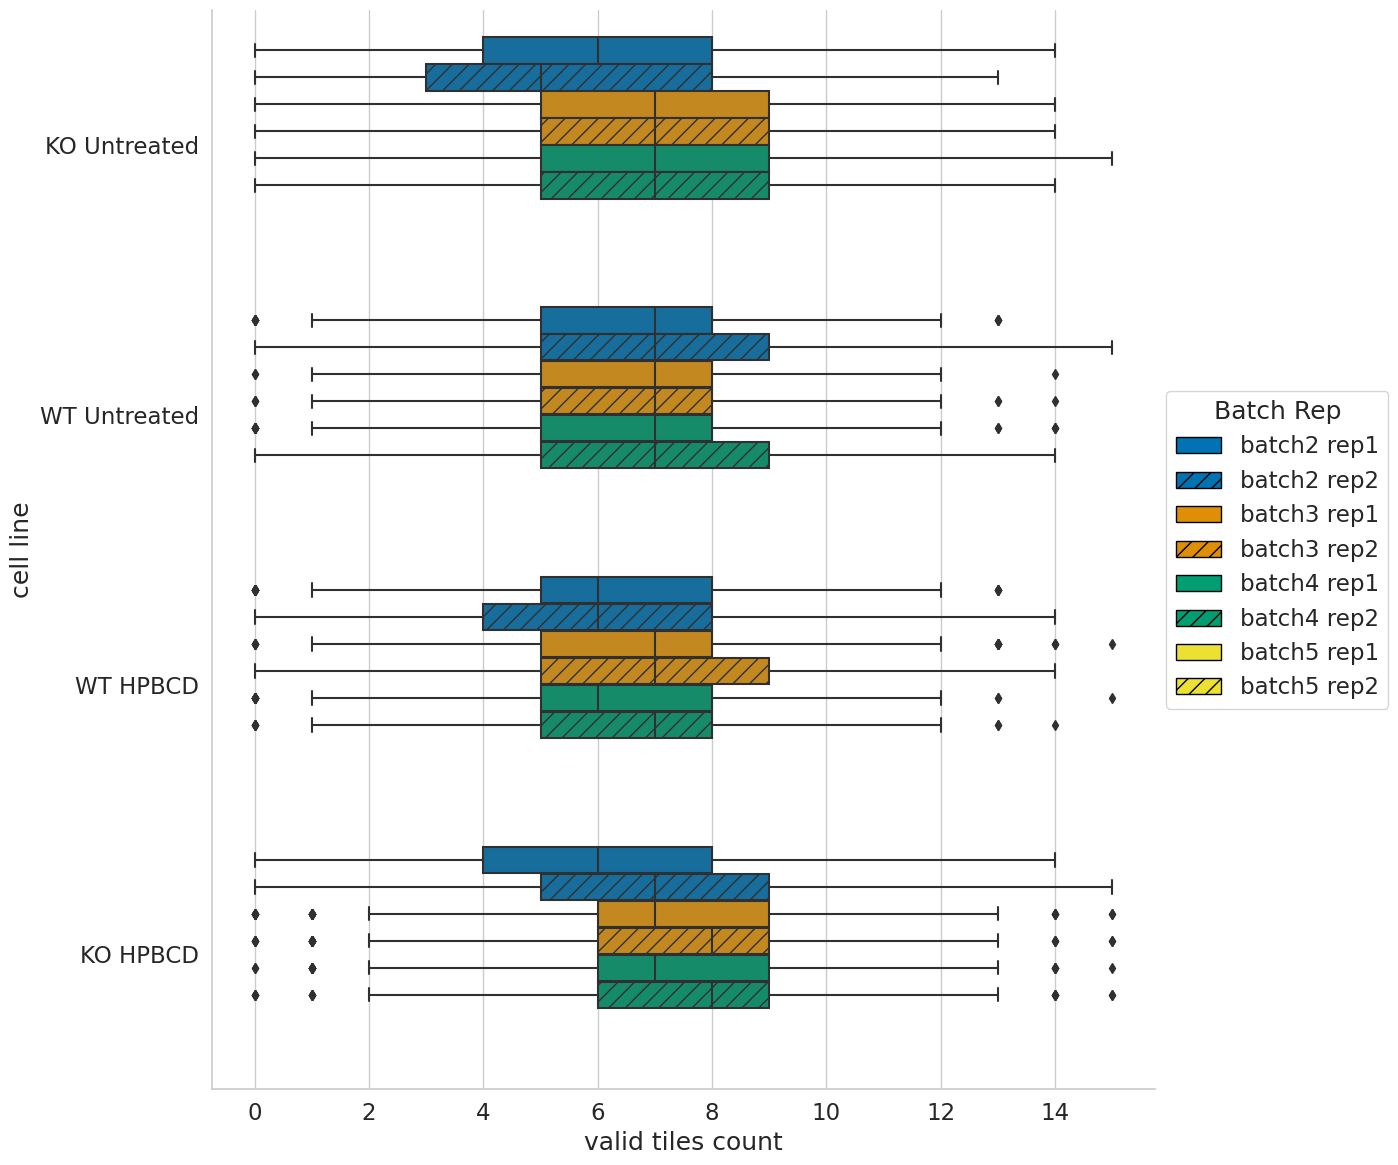

In [29]:
plot_n_valid_tiles_count(df, custom_palette, reps, batch_min=2, batch_max=5)


## <font color='purple'>Heatmap QC per batch, panel and cell line(tiles that passed QC condition)  </font>


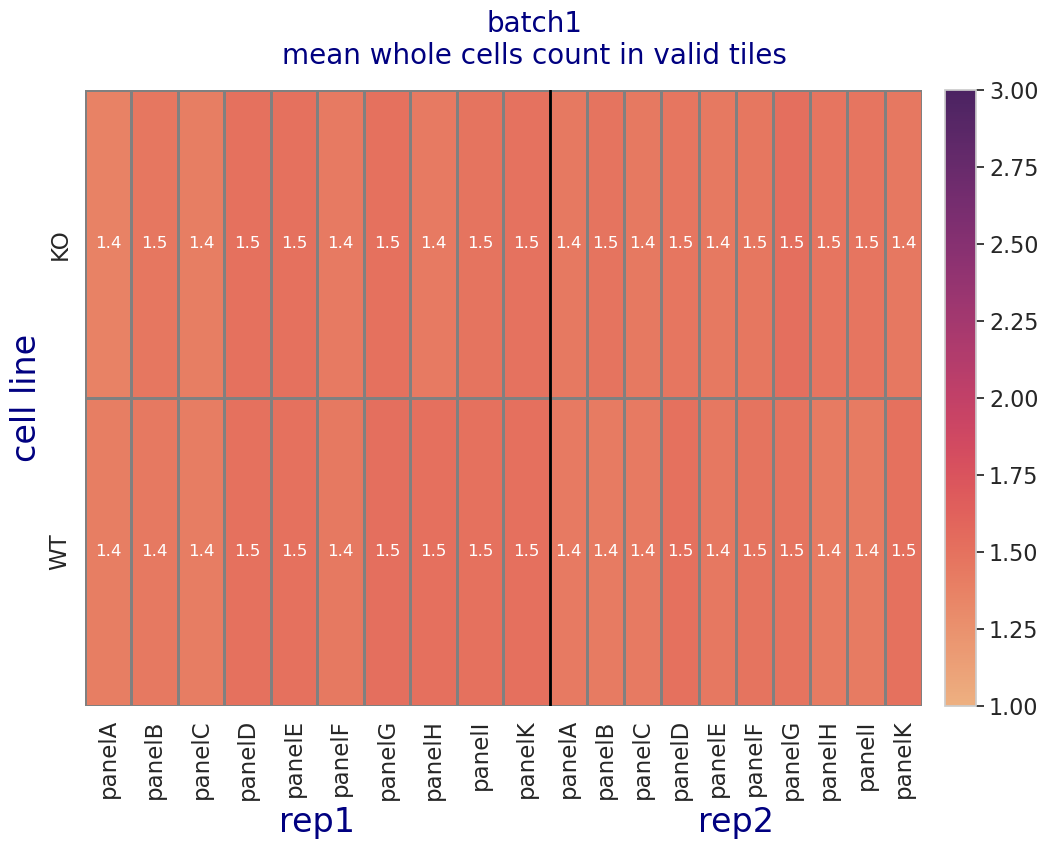

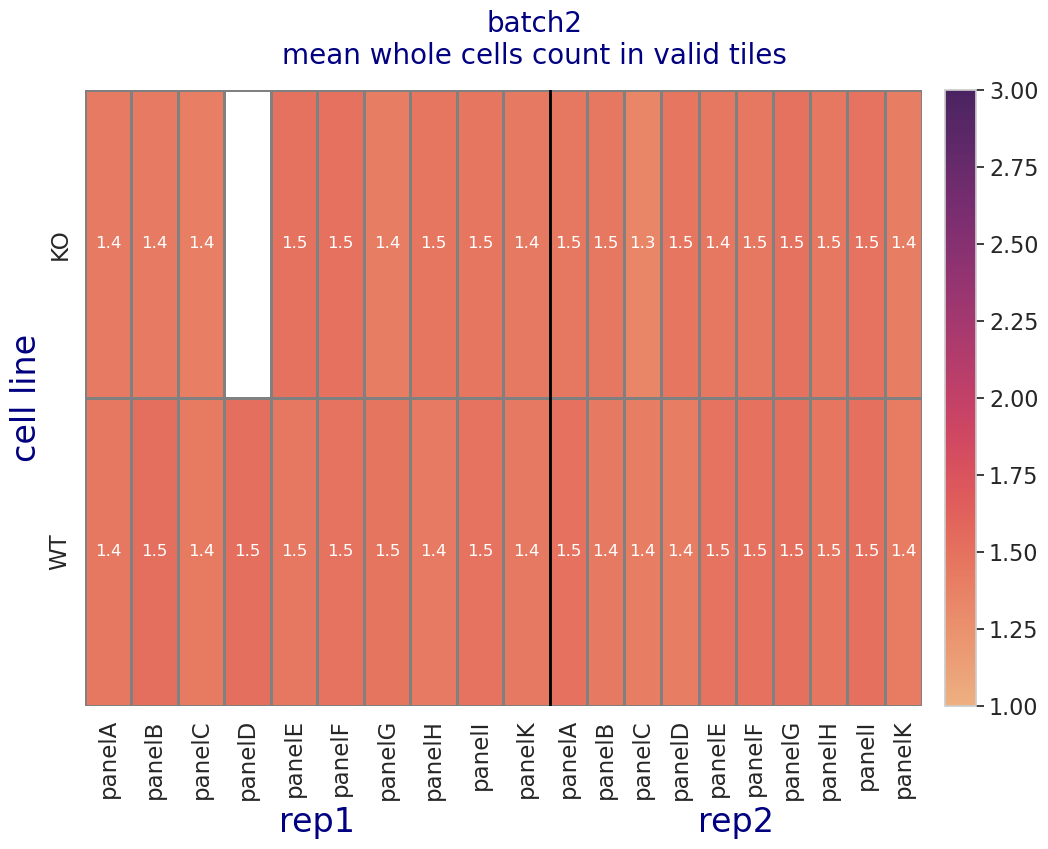

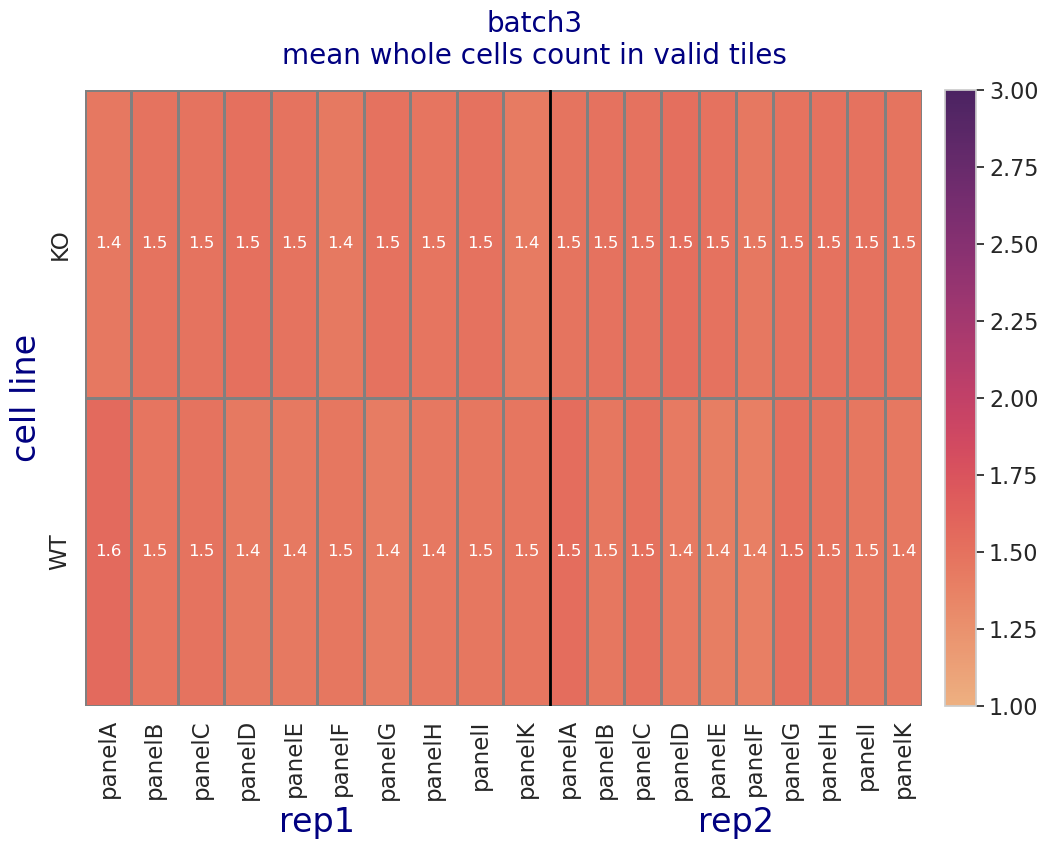

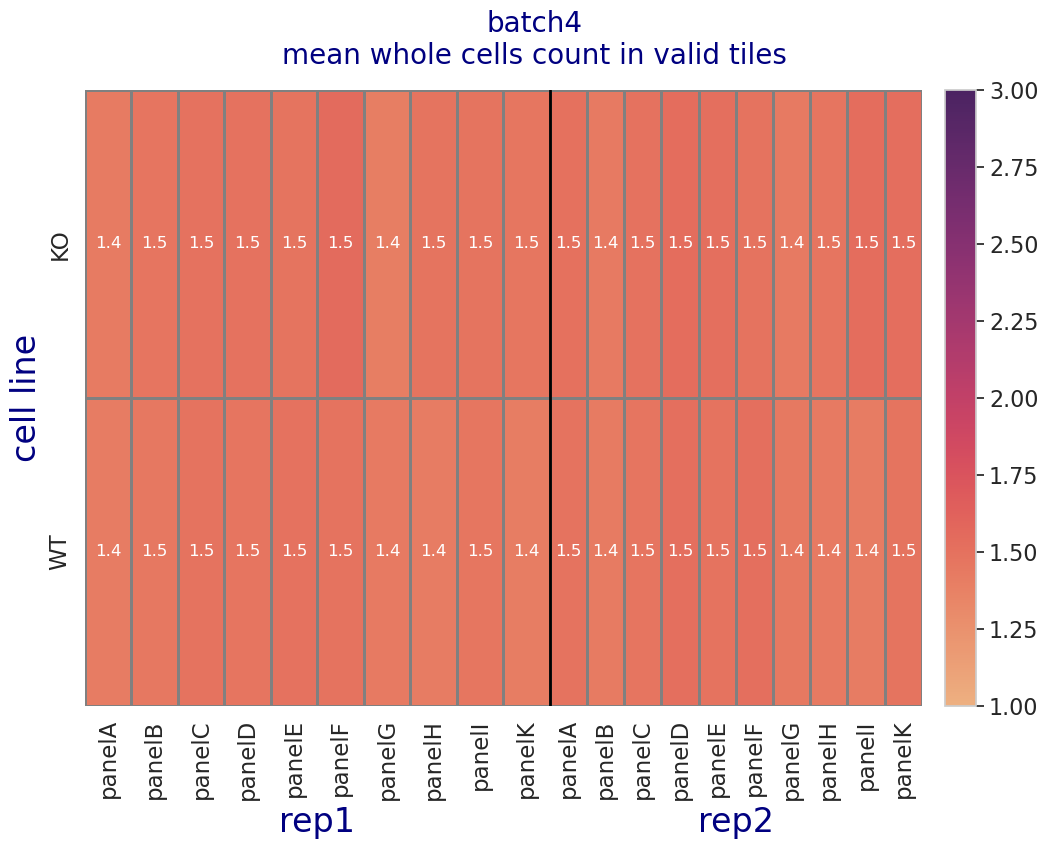

In [5]:
plot_hm(df, split_by='rep', rows='cell_line', columns='panel')

# Assessing Staining Reproducibility and Outliers

In [6]:
# for batch in batches:
#     print(batch)
#     run_calc_hist_new(batch,sample_size_per_markers=10)
#     print("="*30)

In [15]:
print(os.system('pwd'))
print("Done!")

/home/labs/hornsteinlab/Collaboration/MOmaps
0
Done!


In [7]:
# save notebook as HTML ( the HTML will be saved in the same folder the original script is)
from IPython.display import display, Javascript
display(Javascript('IPython.notebook.save_checkpoint();'))
os.system('jupyter nbconvert --to html src/preprocessing/notebooks/cell_count_stats_analysis_NP.ipynb')

<IPython.core.display.Javascript object>

[NbConvertApp] Converting notebook src/preprocessing/notebooks/cell_count_stats_analysis_NP.ipynb to html
[NbConvertApp] Writing 10622070 bytes to src/preprocessing/notebooks/cell_count_stats_analysis_NP.html


0